In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(58592, 44)

In [4]:
test_df.shape

(39063, 43)

In [5]:
df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
df.duplicated().sum()

0

In [9]:
df.select_dtypes("object").nunique()

policy_id                           58592
area_cluster                           22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
steering_type                           3
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
is_brake_assist                         2
is_power_door_locks                     2
is_central_locking                      2
is_power_steering                 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [11]:
numerical_feature=[i for i in df.columns if df[i].dtype!='O']
categorical_feature=[i for i in df.columns if df[i].dtype=='O']

In [12]:
for i in categorical_feature:
    print(df[i].unique())
    print(f"{'*'*20}")

['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
********************
['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
********************
['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
********************
['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
********************
['CNG' 'Petrol' 'Diesel']
********************
['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
********************
['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
********************
['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
********************
['

In [13]:
print(numerical_feature)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


In [14]:
print(categorical_feature)

['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [15]:
def data_preprocessor(df):

    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
   

In [16]:
data_preprocessor(df)

In [17]:
df.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [18]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm'],
      dtype='object')

### This is a imbalanced dataset. We need to handle it before feed to model

## Univariate Analysis

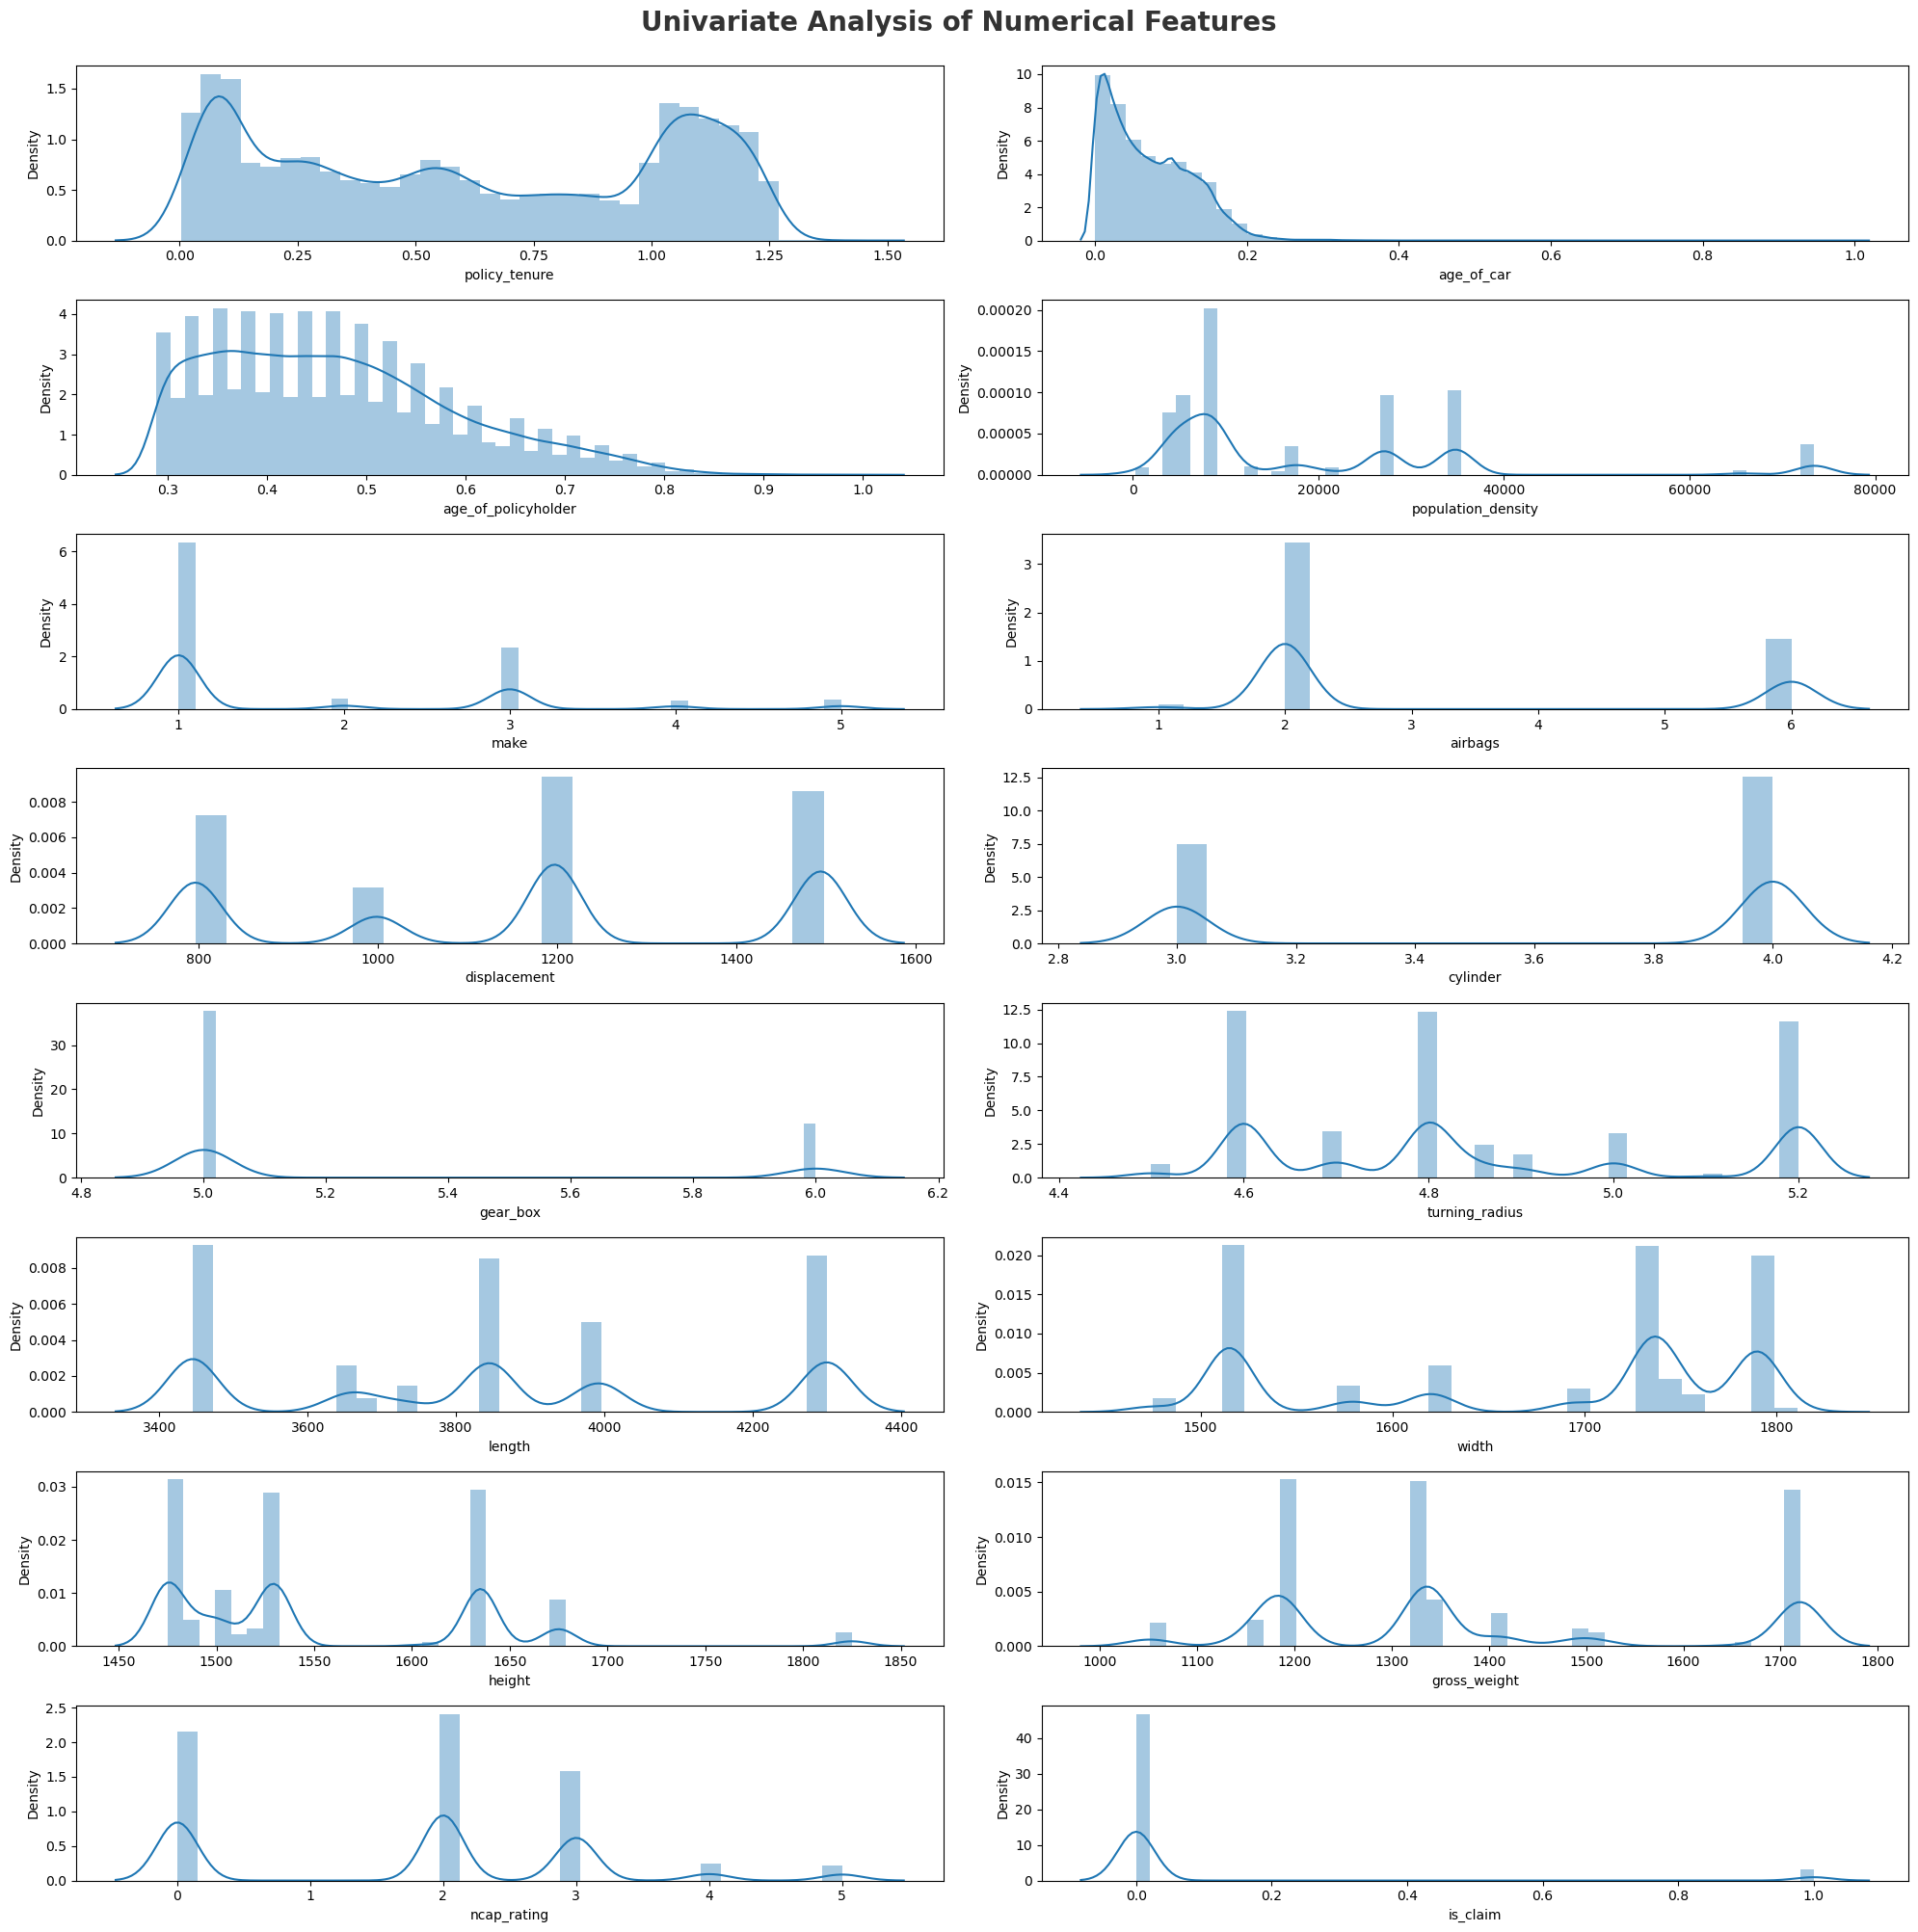

In [19]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(8, 2, i+1)
    sns.distplot(df[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

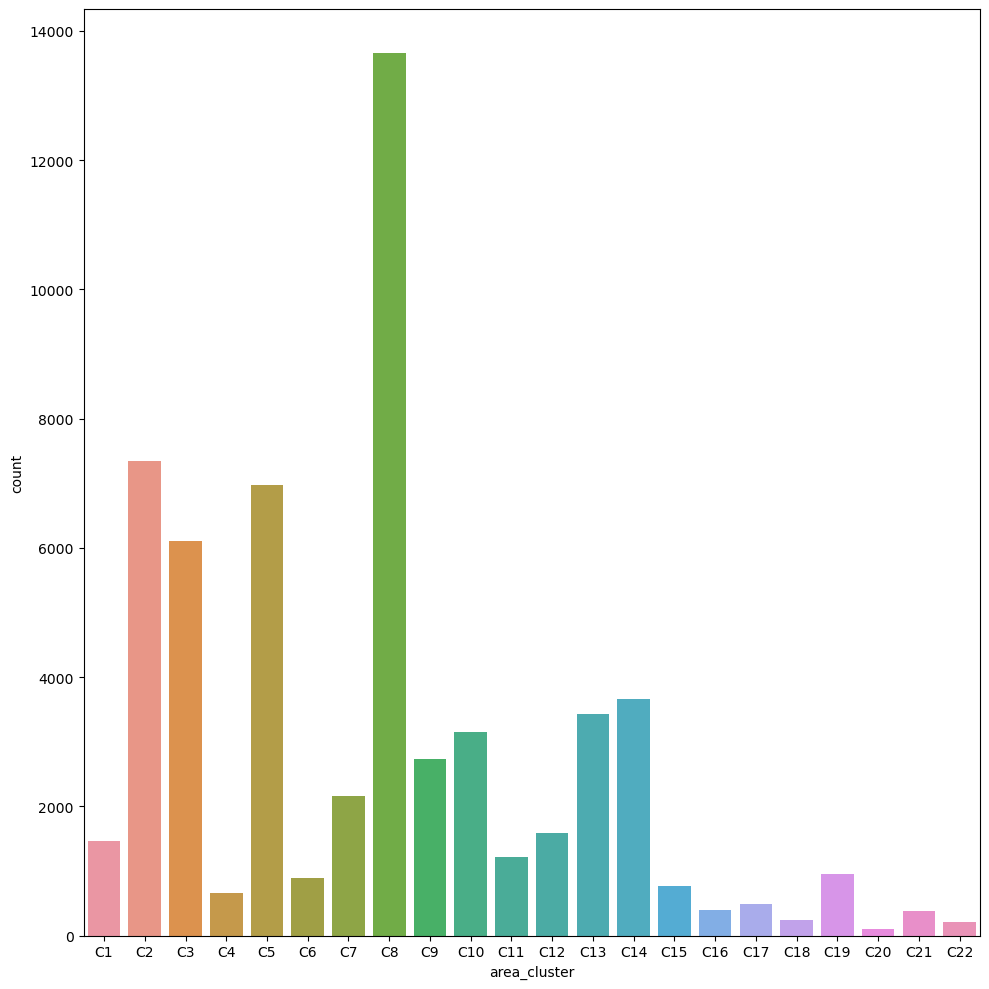

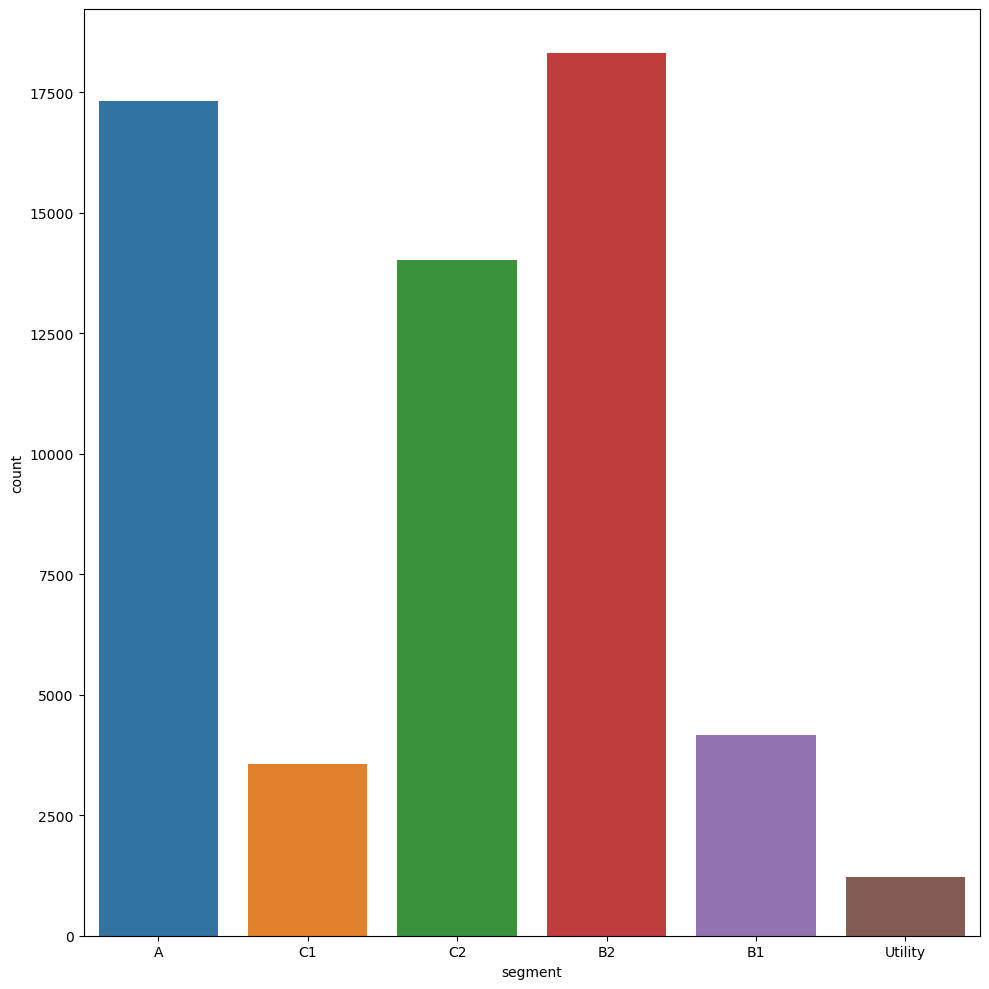

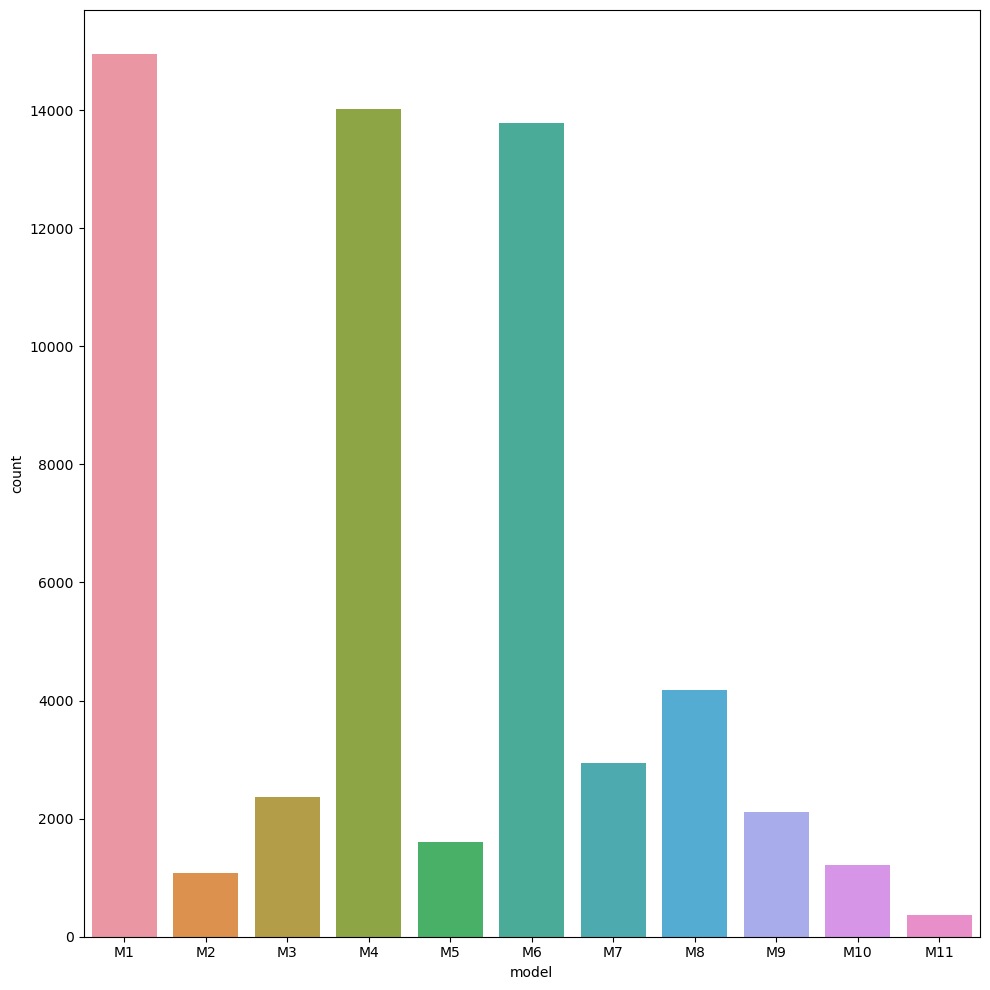

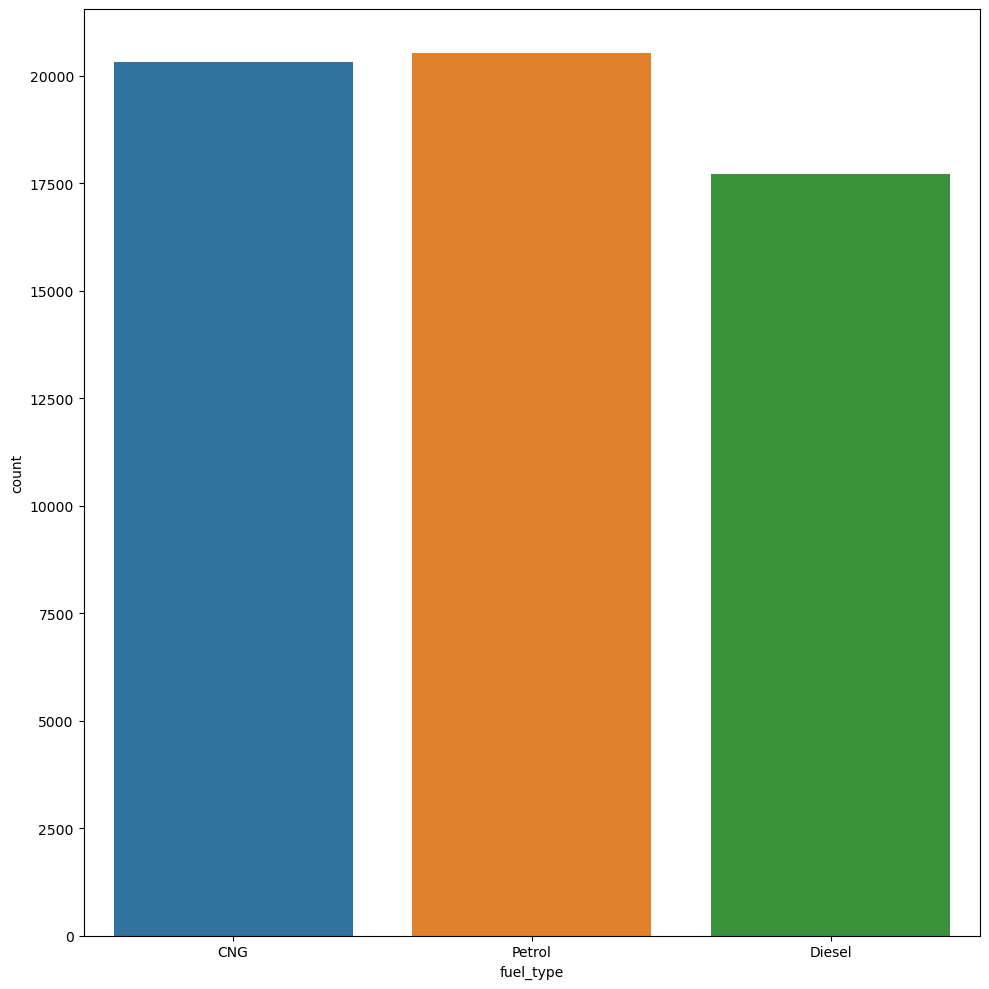

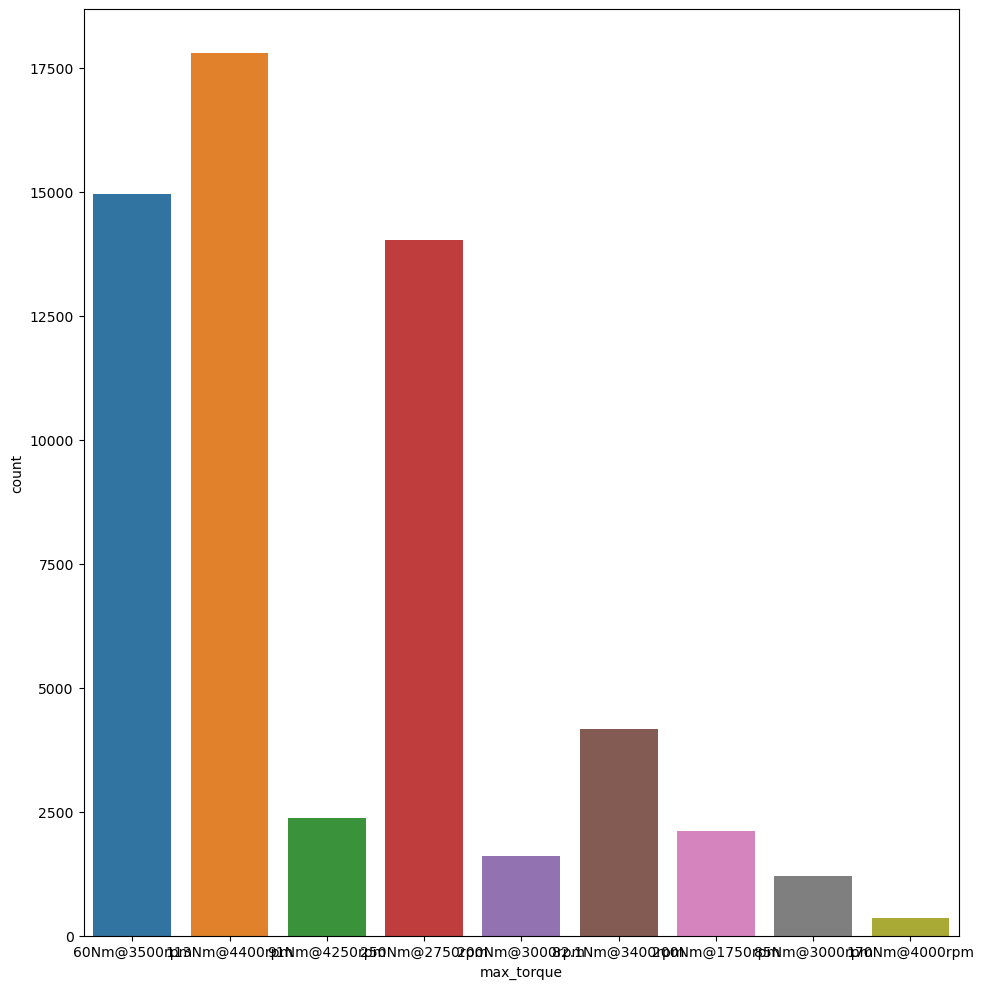

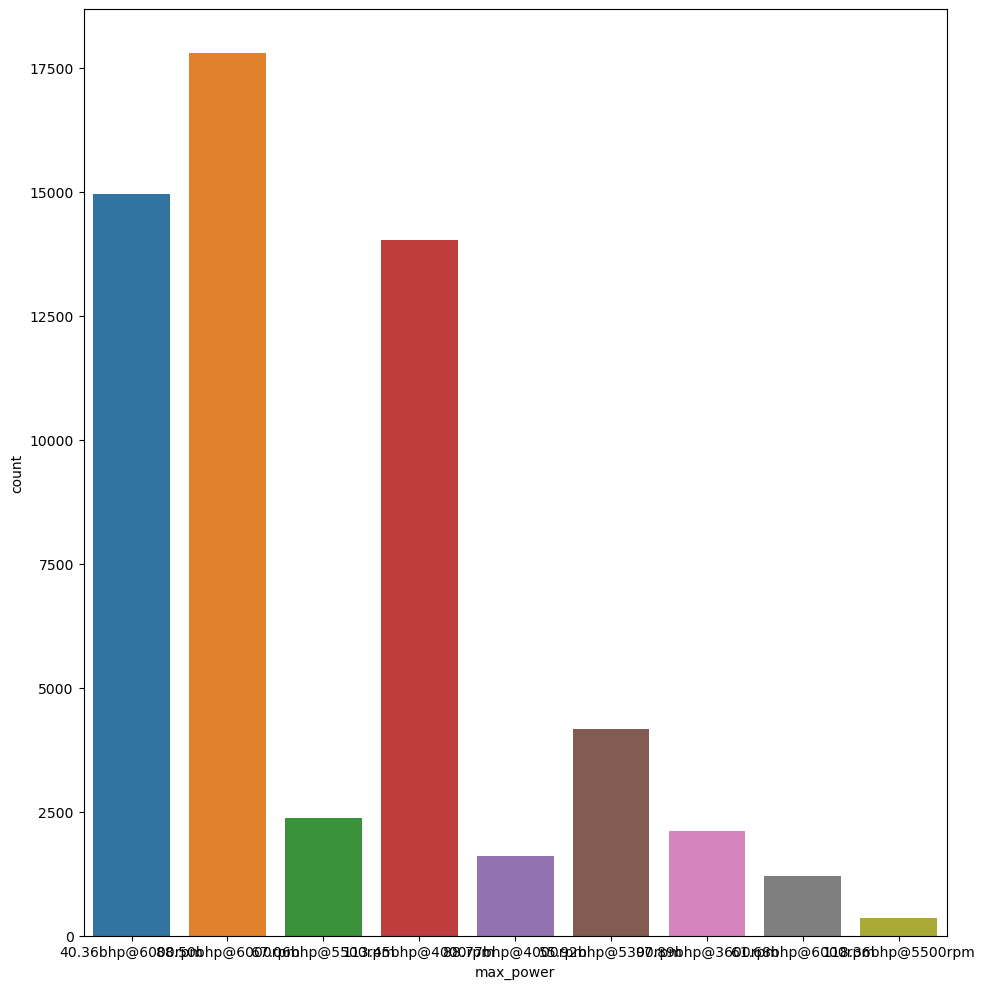

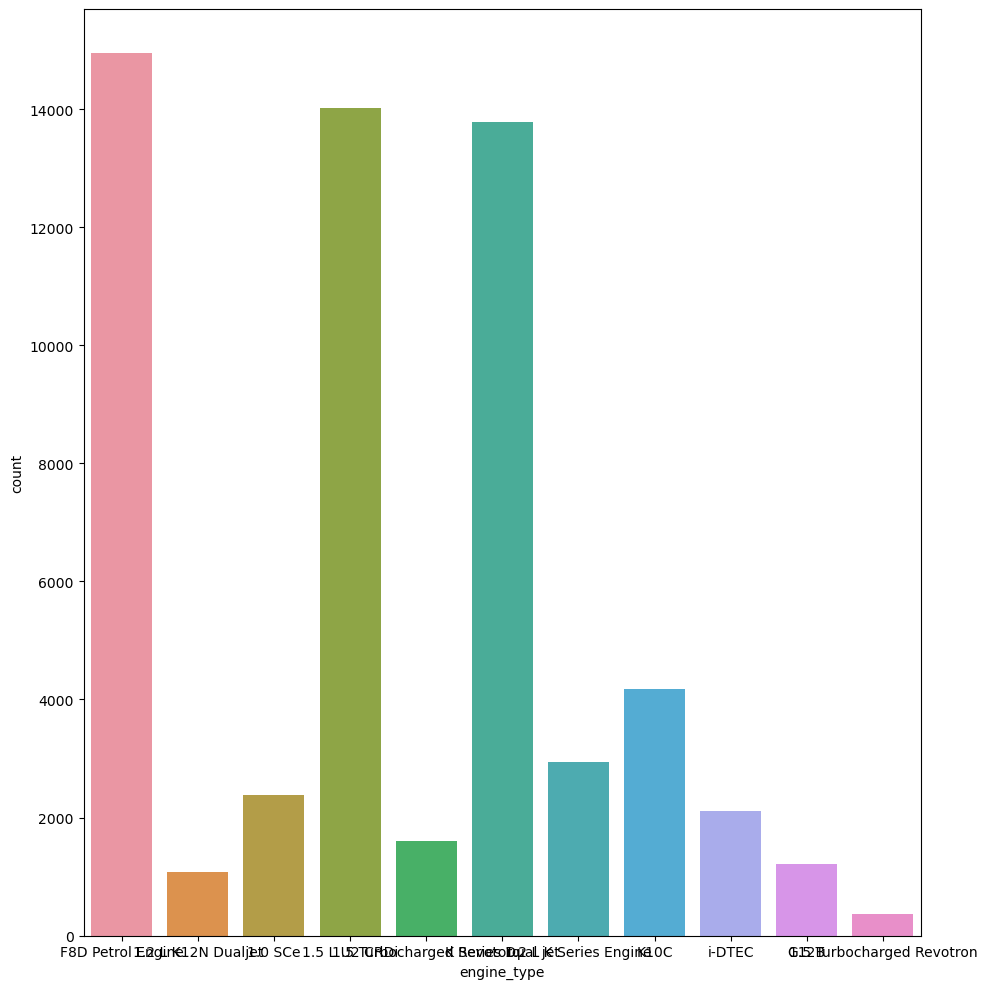

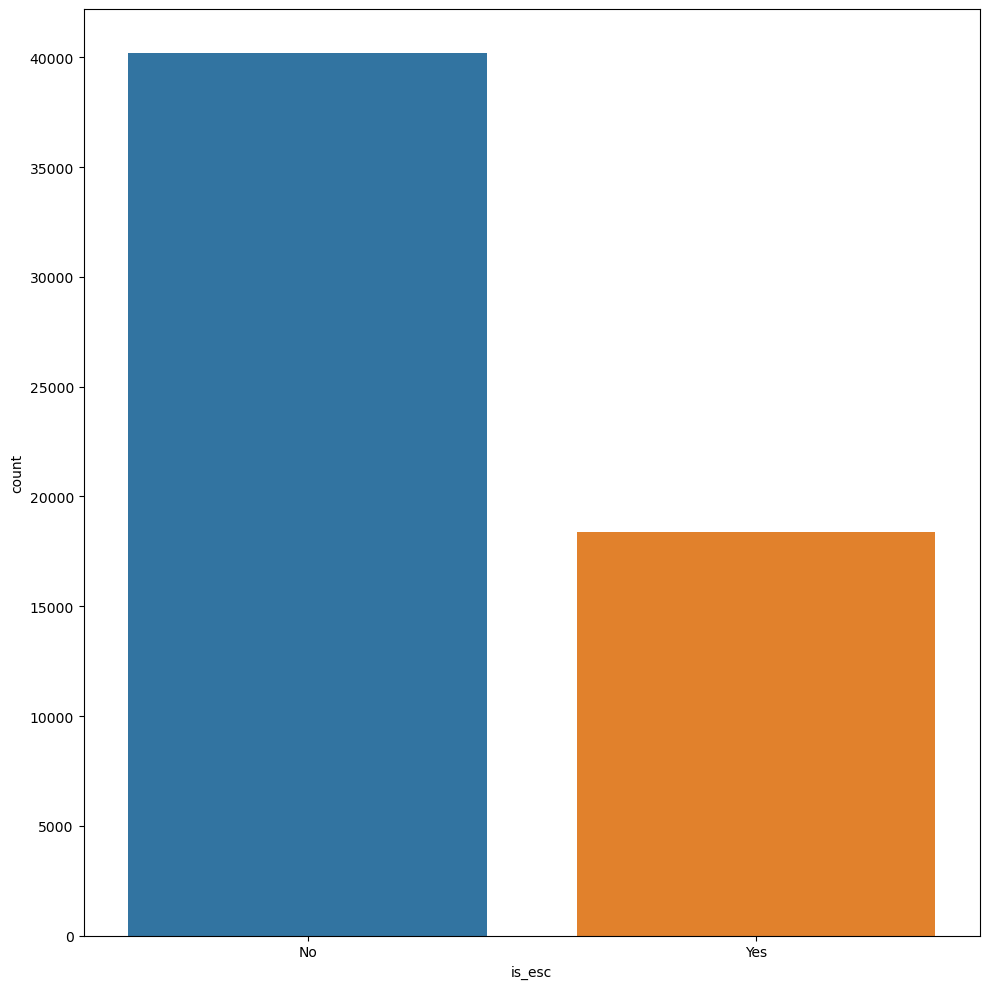

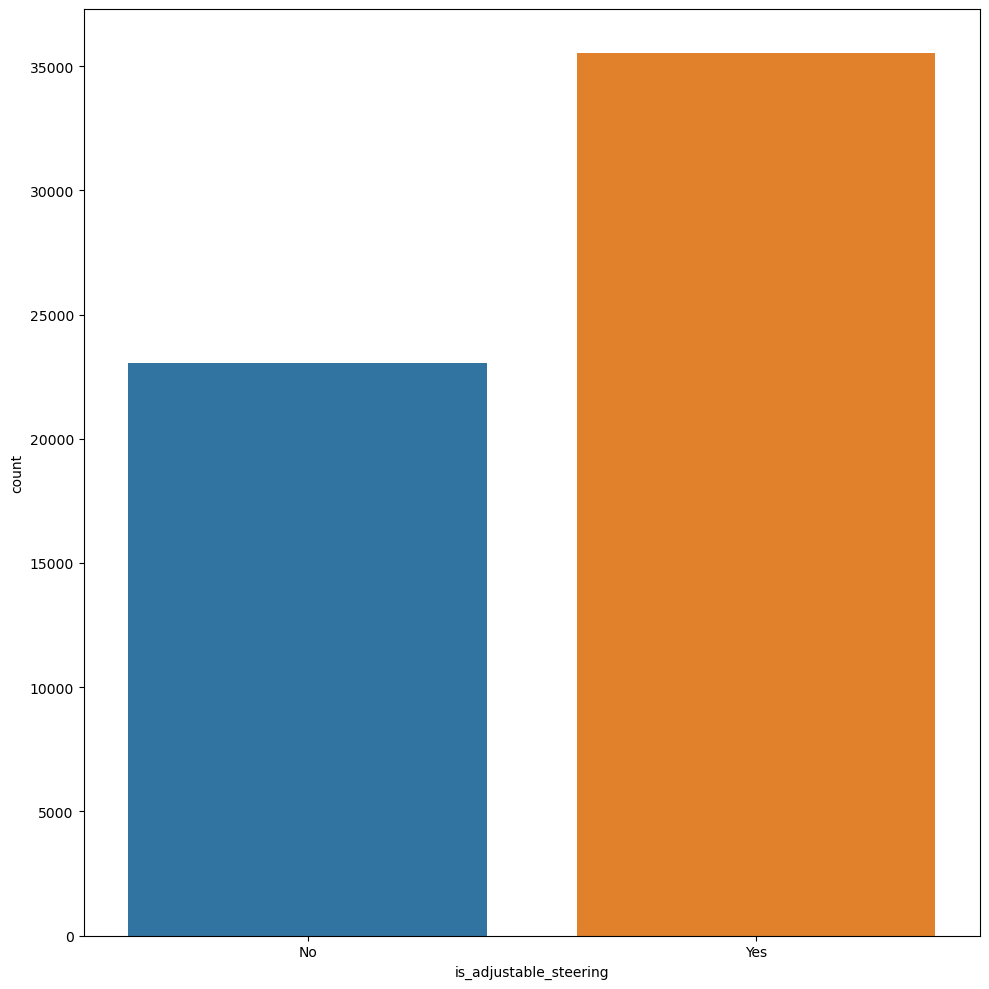

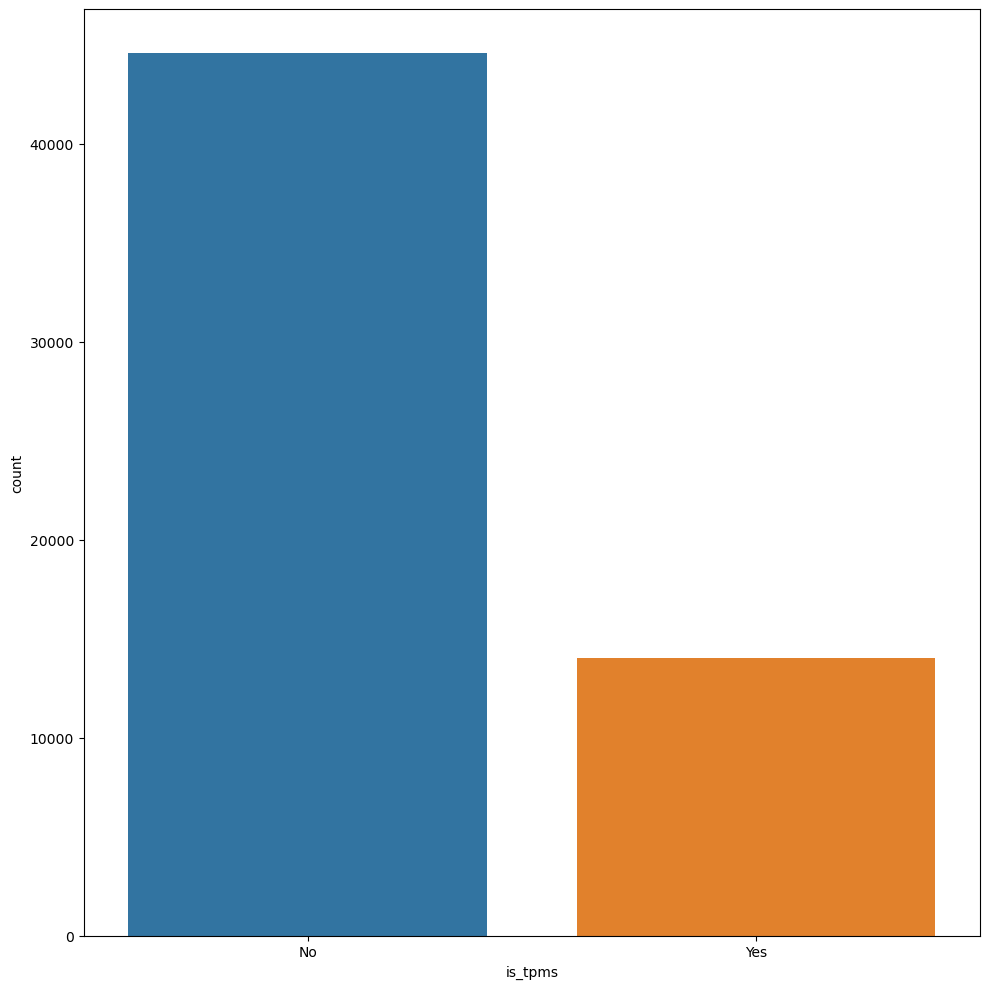

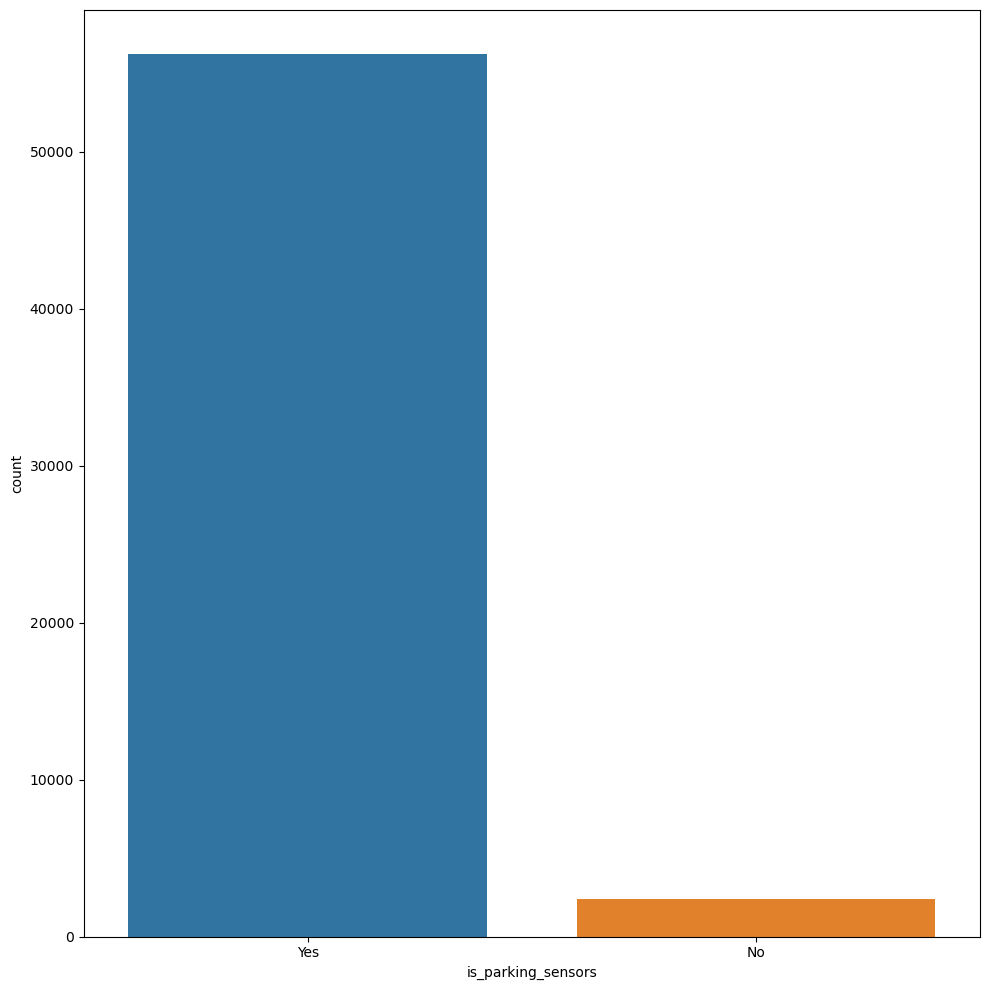

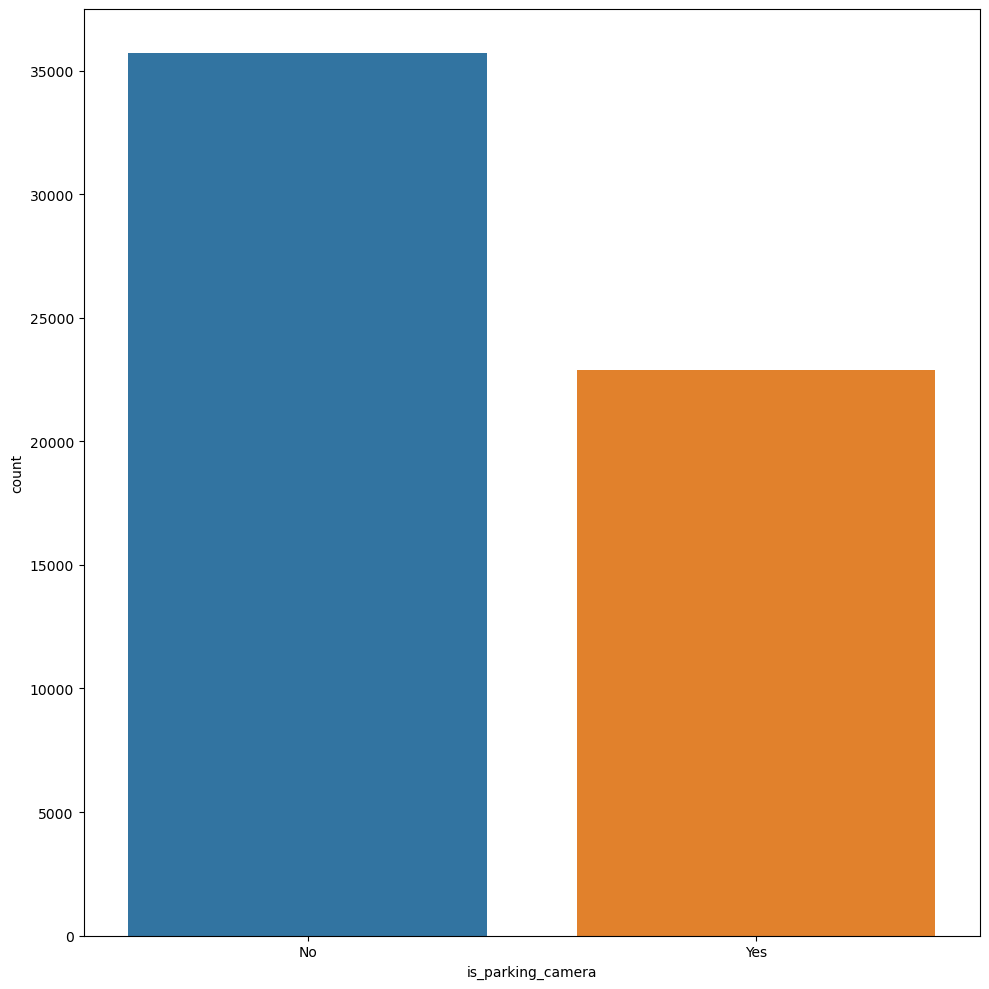

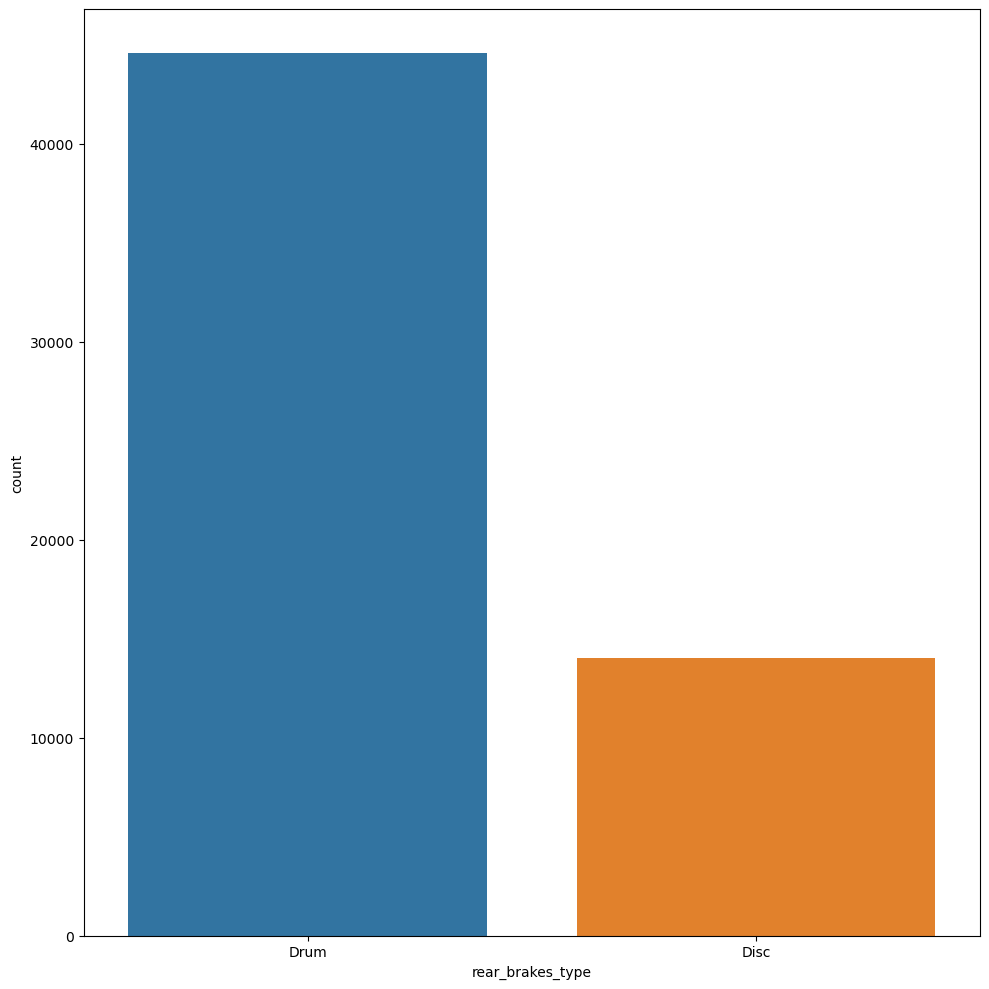

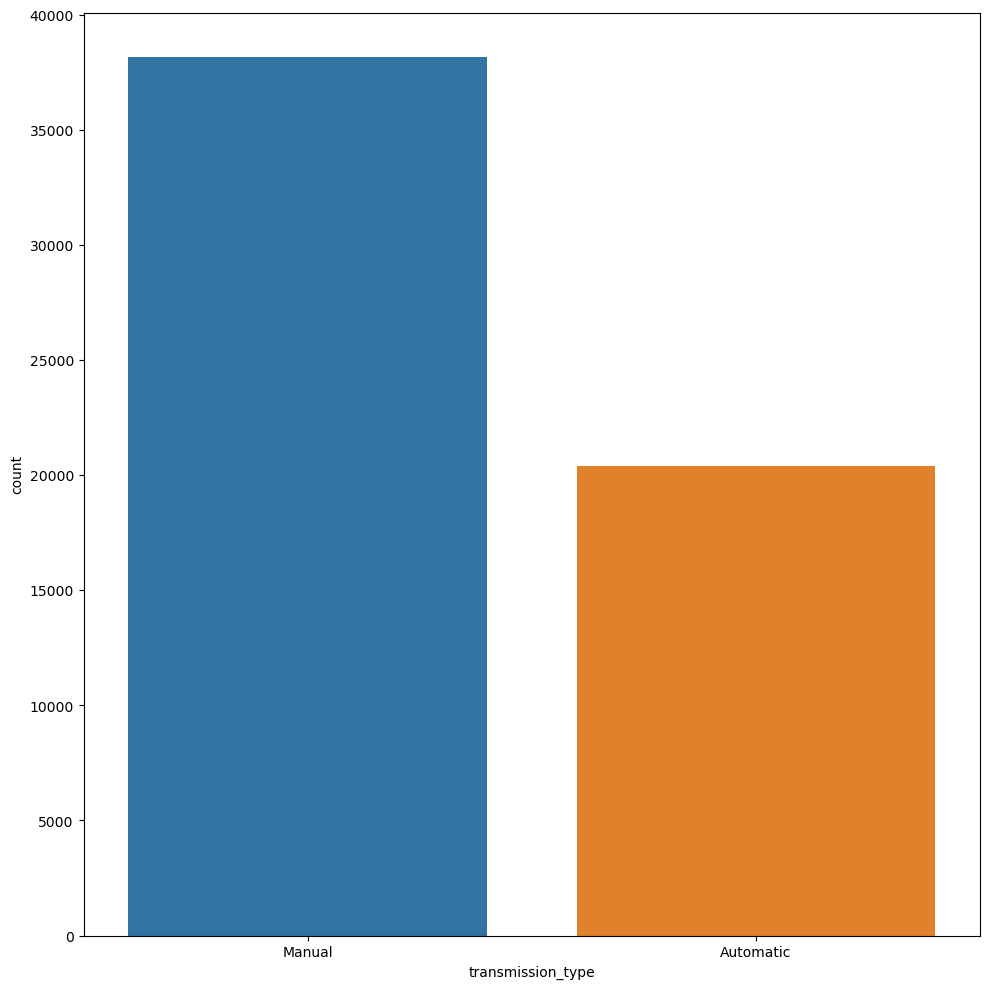

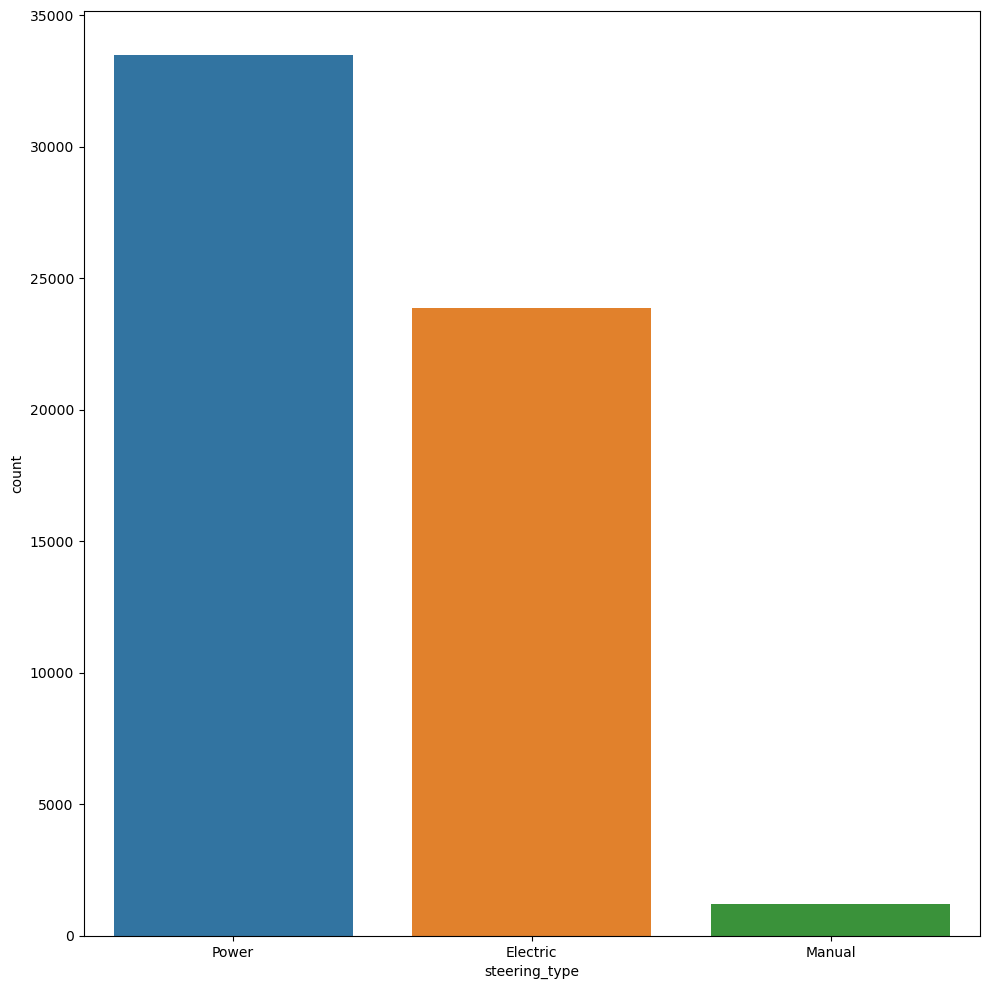

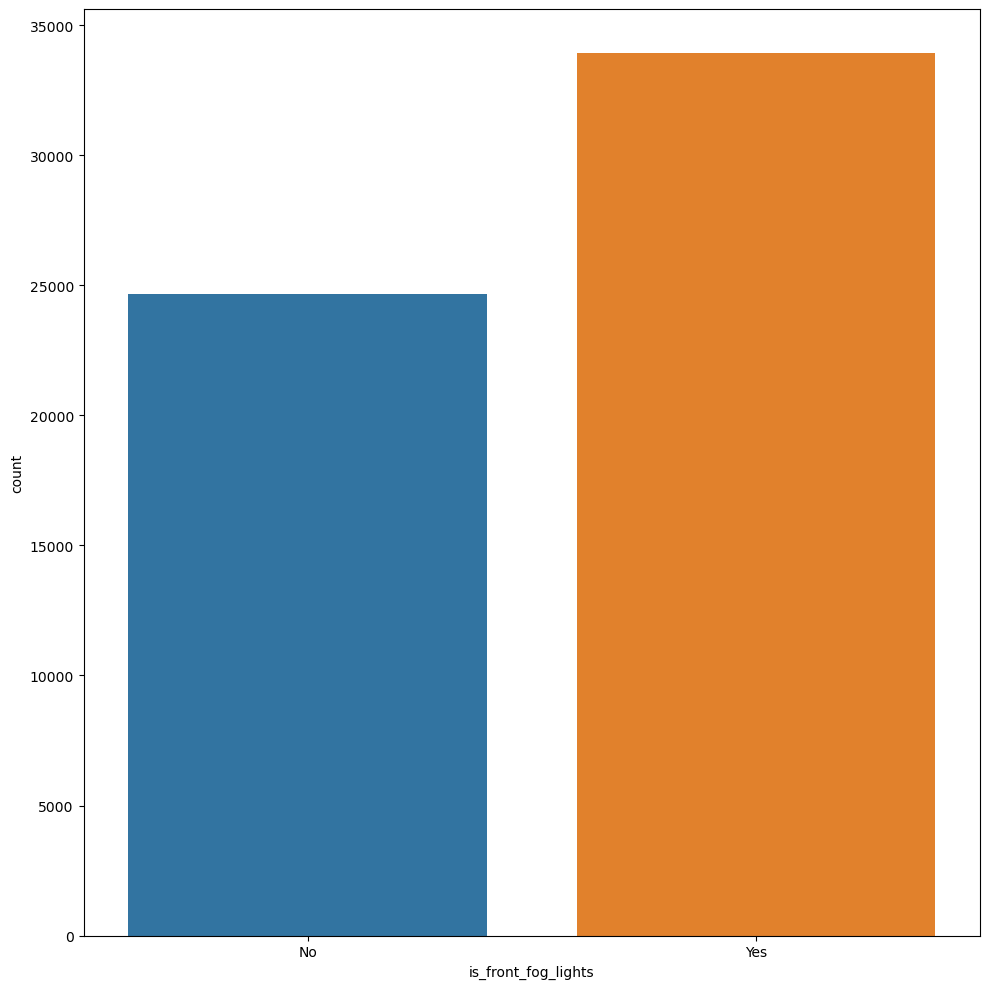

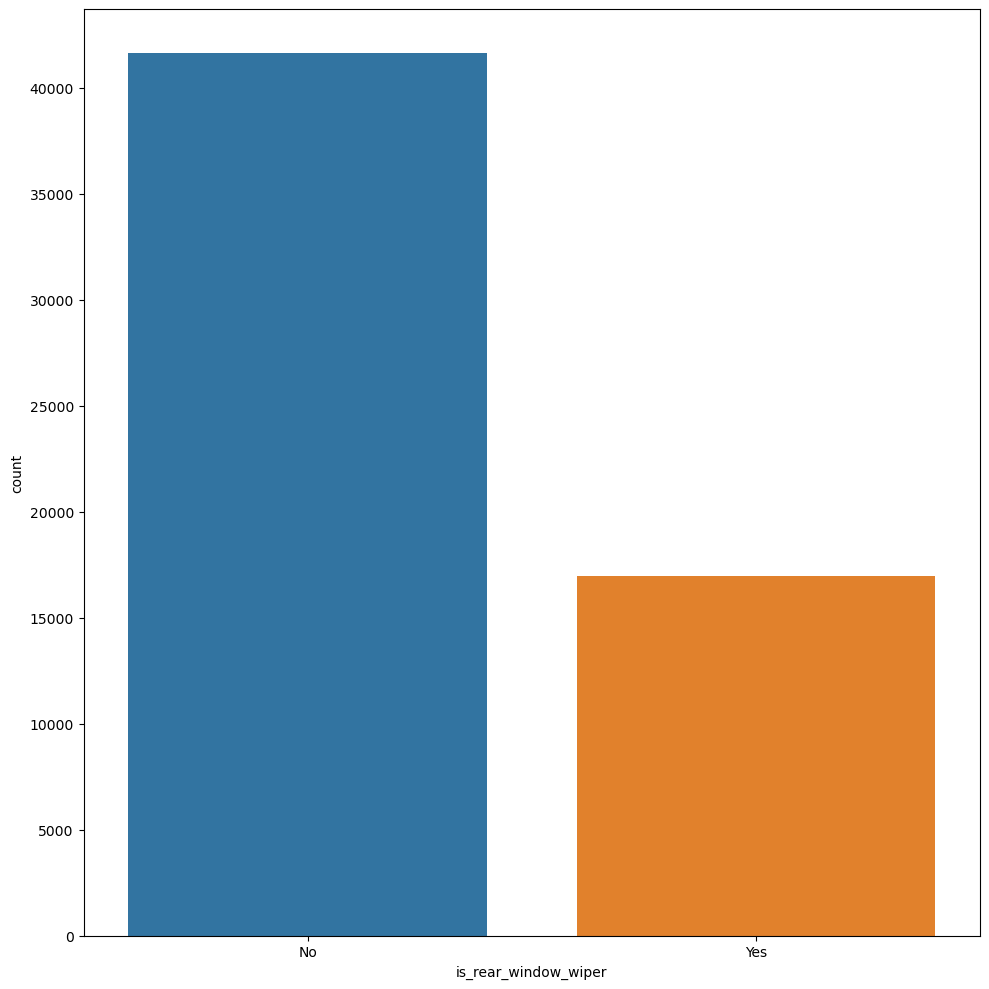

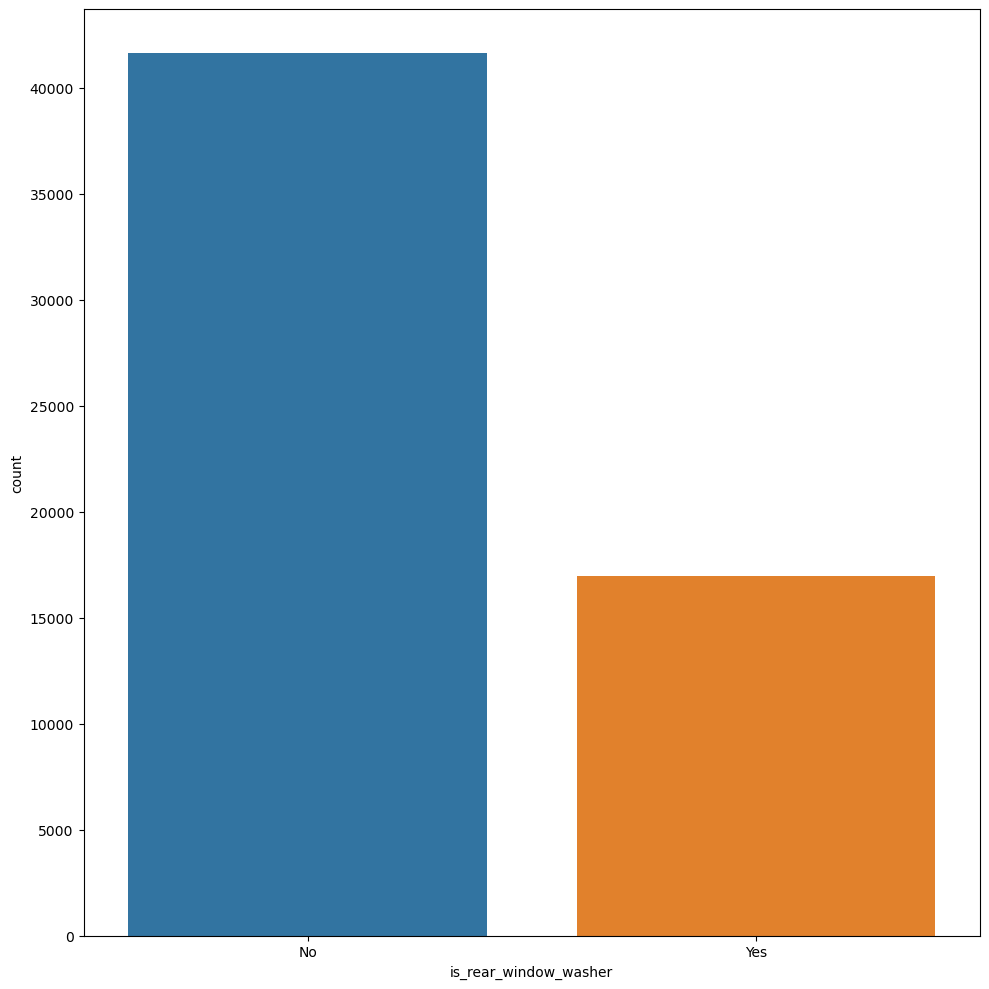

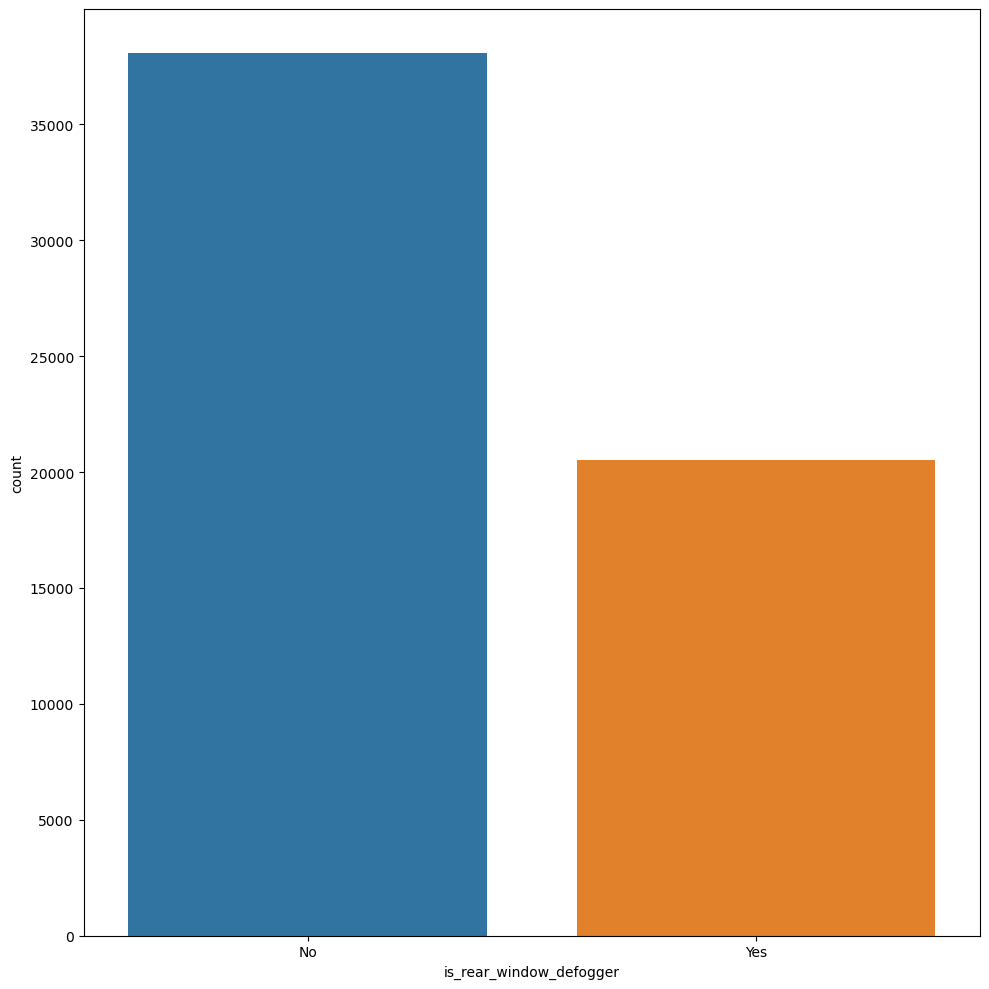

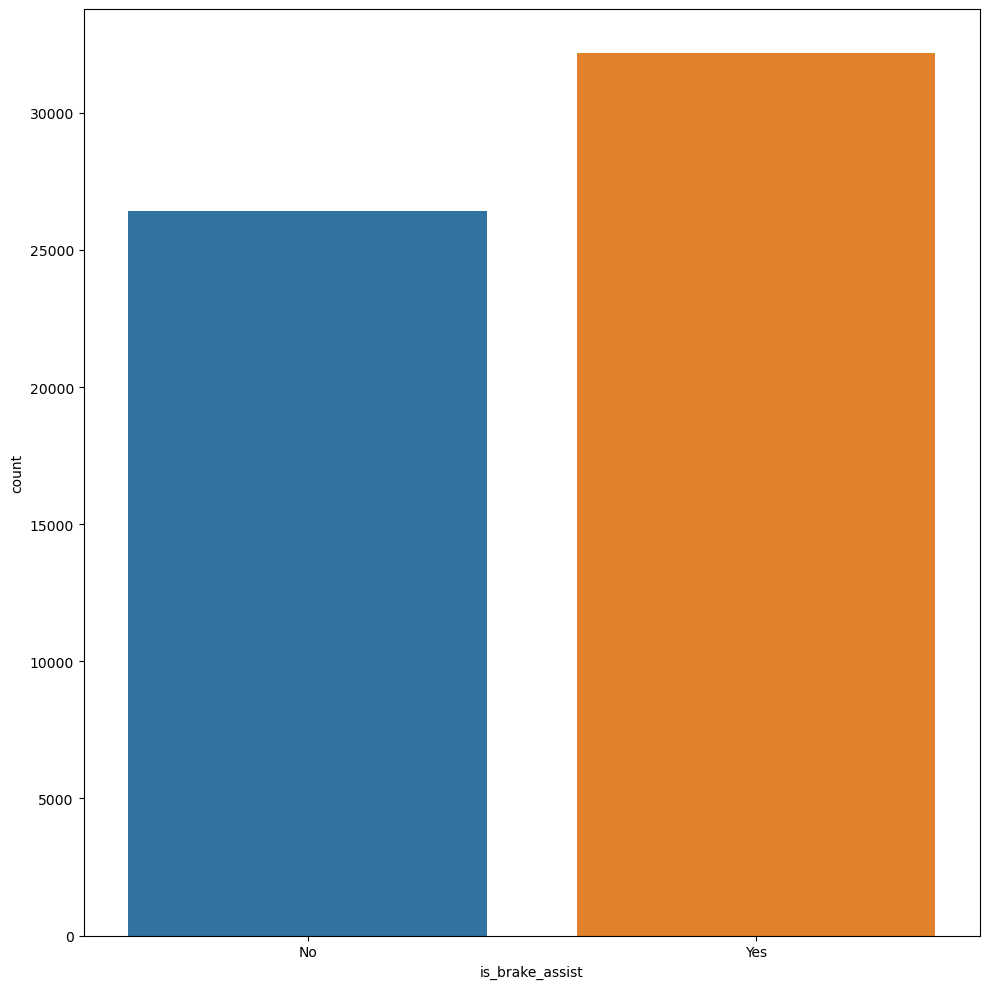

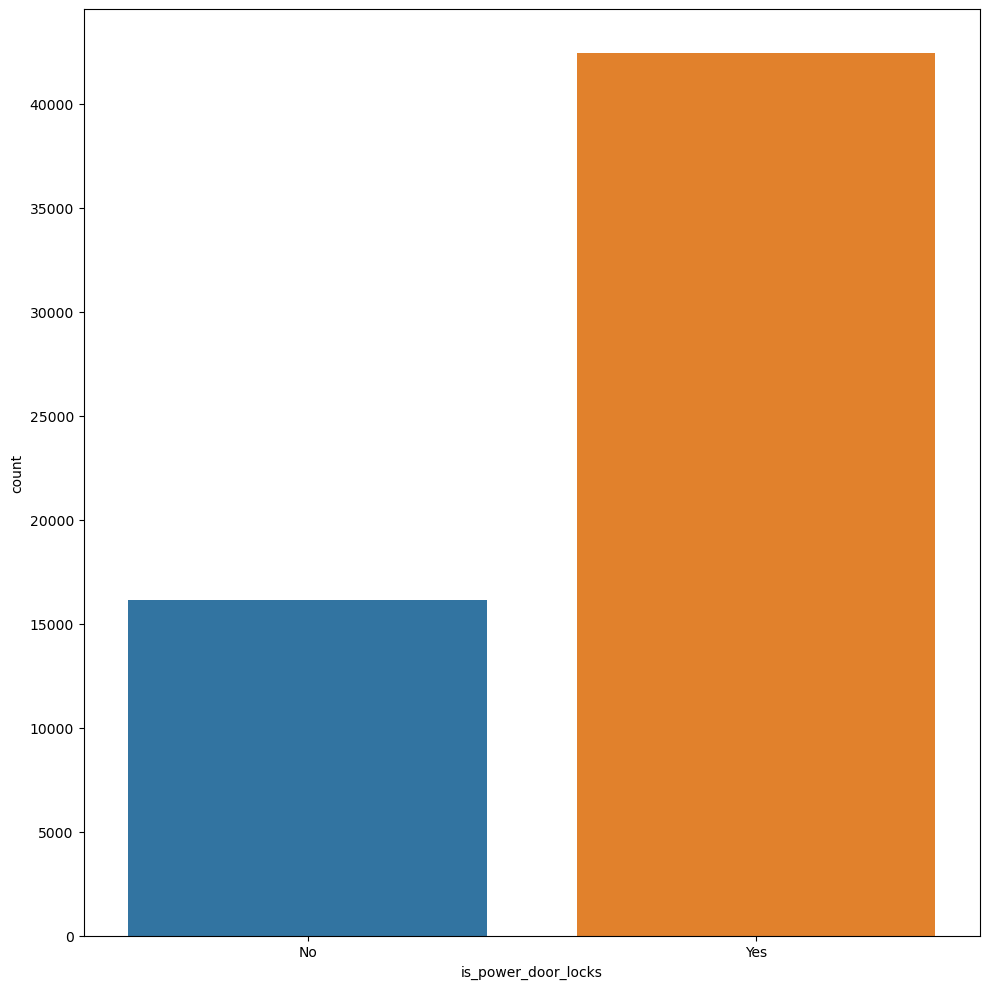

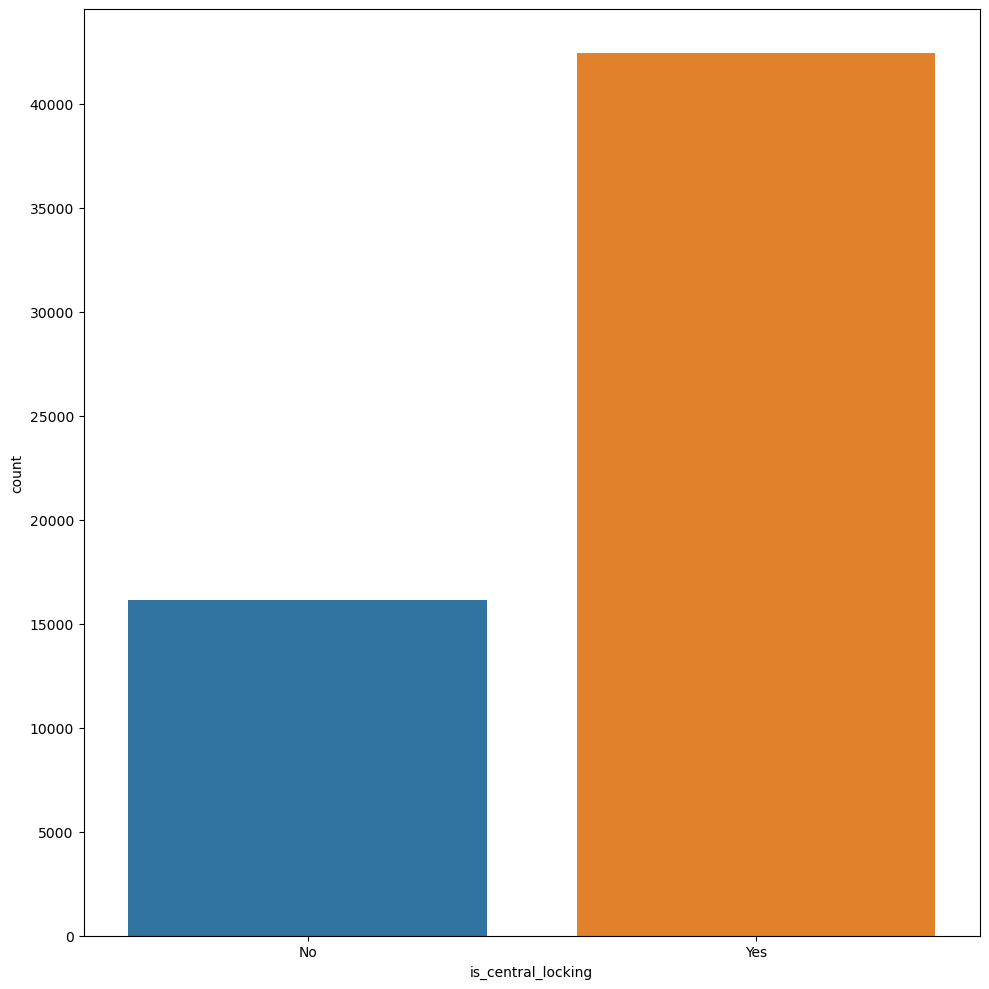

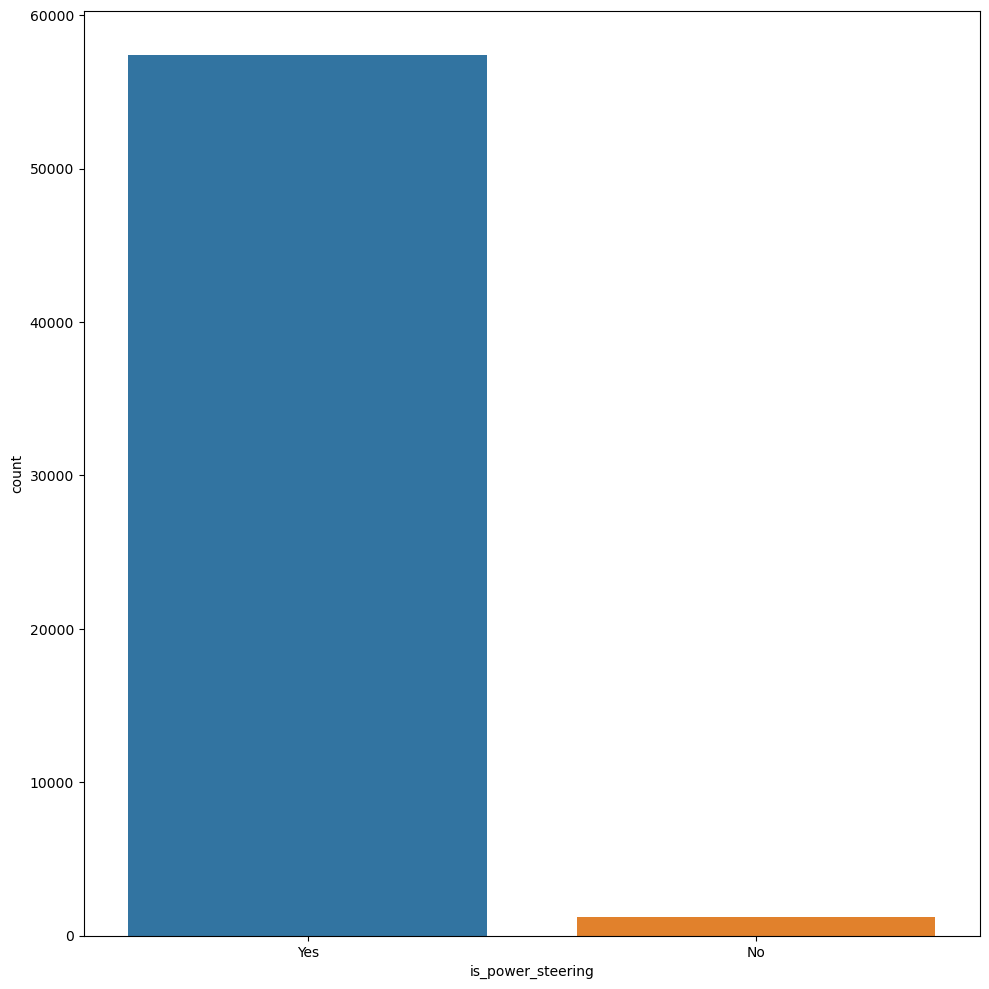

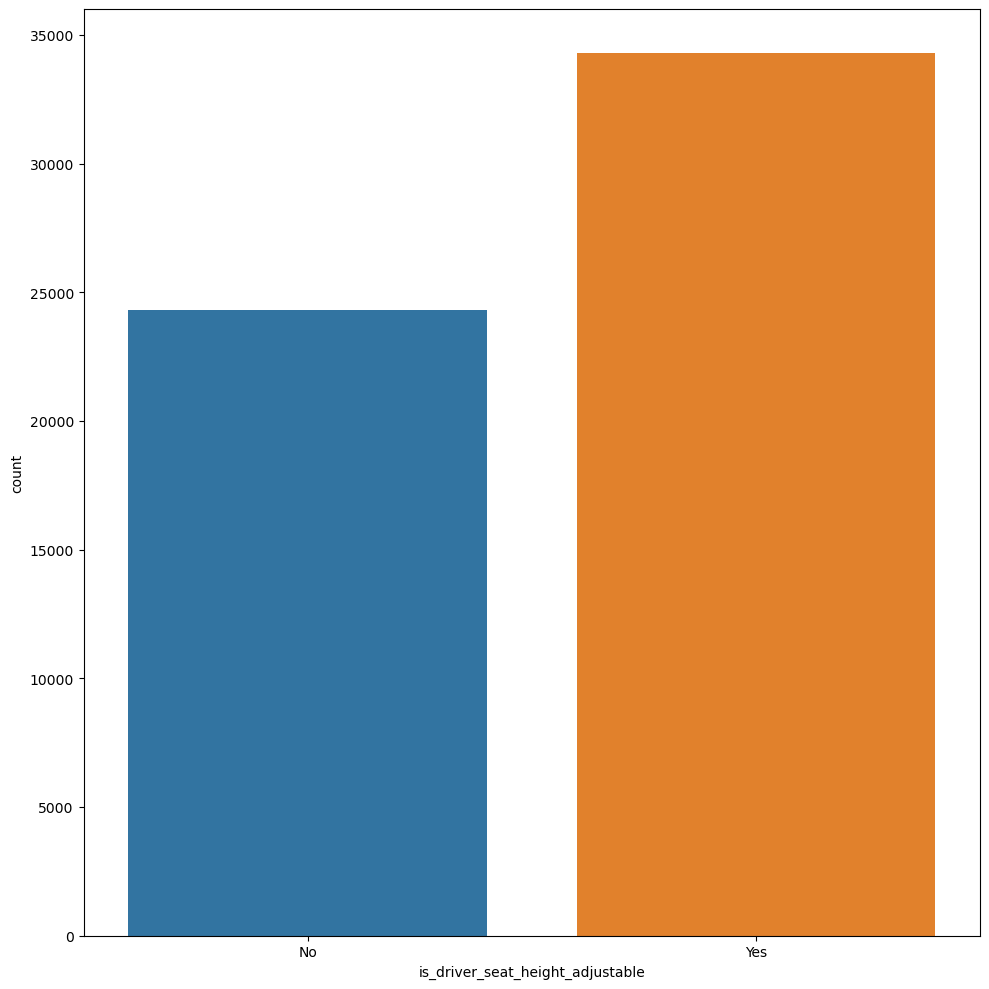

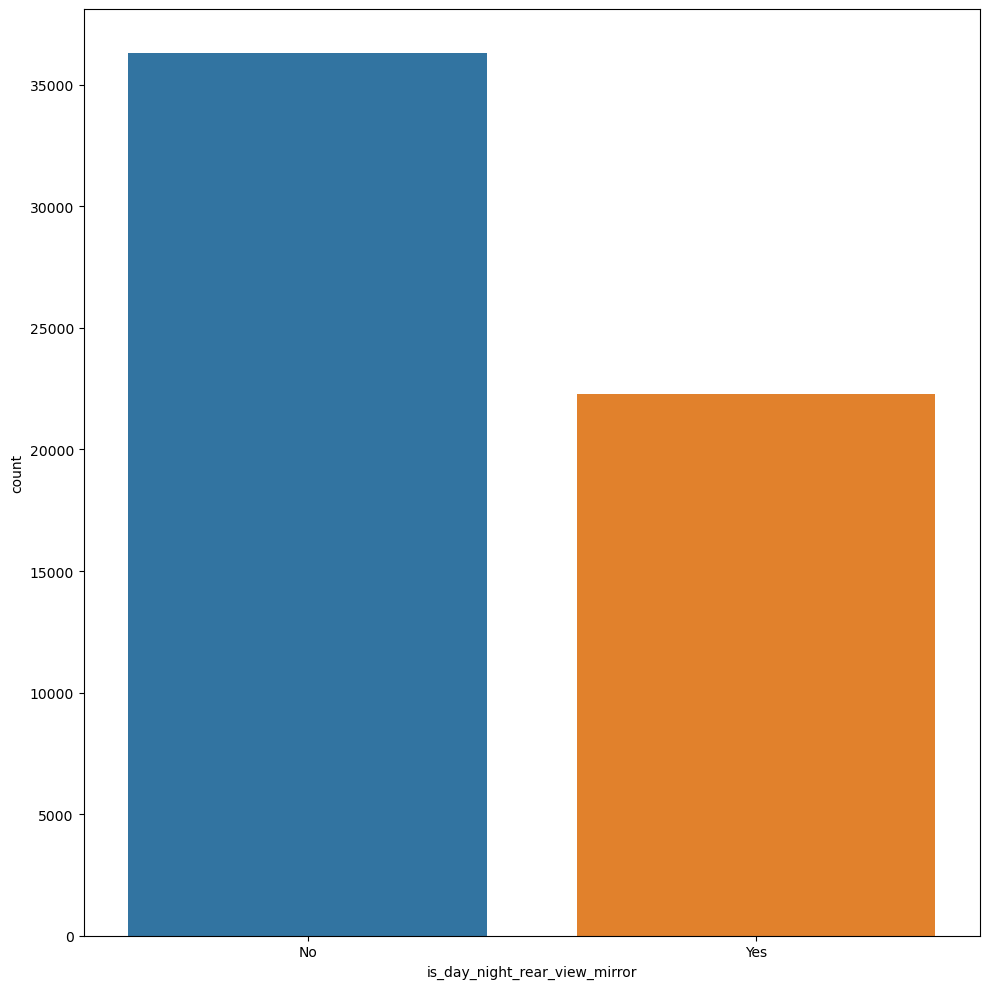

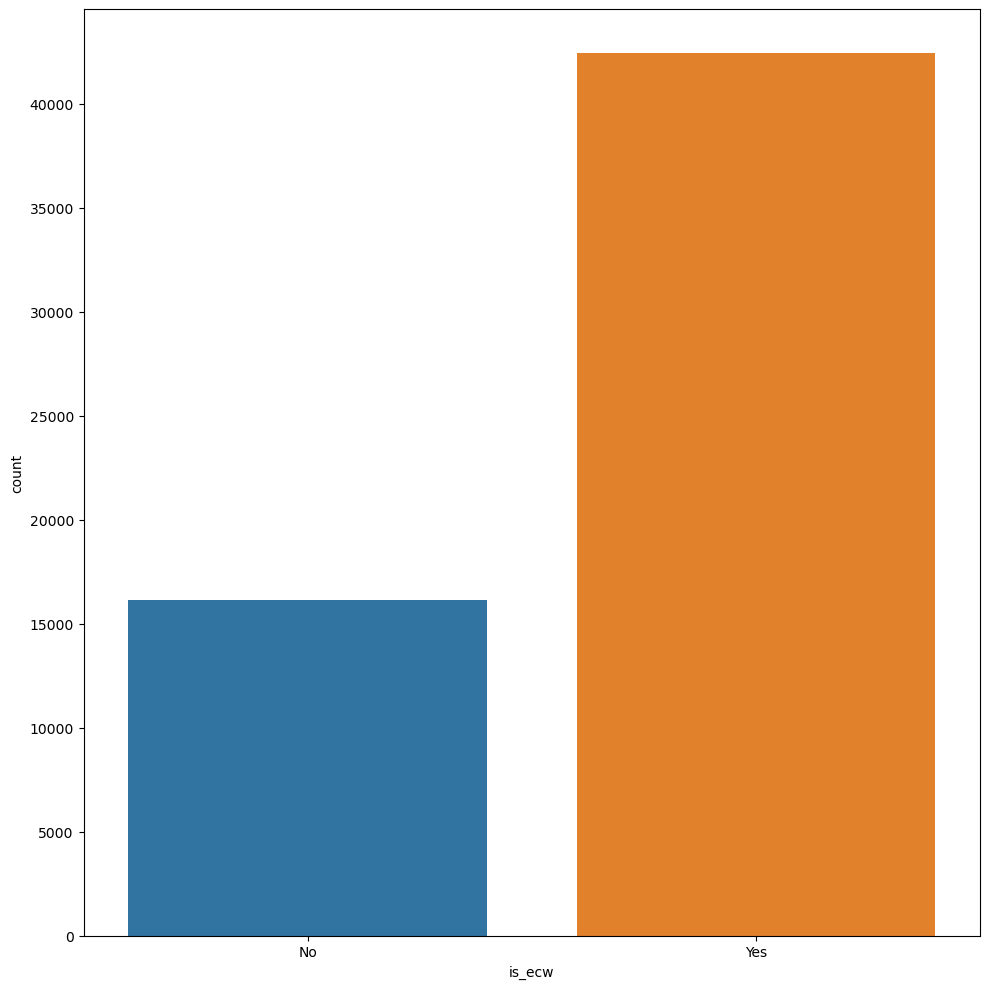

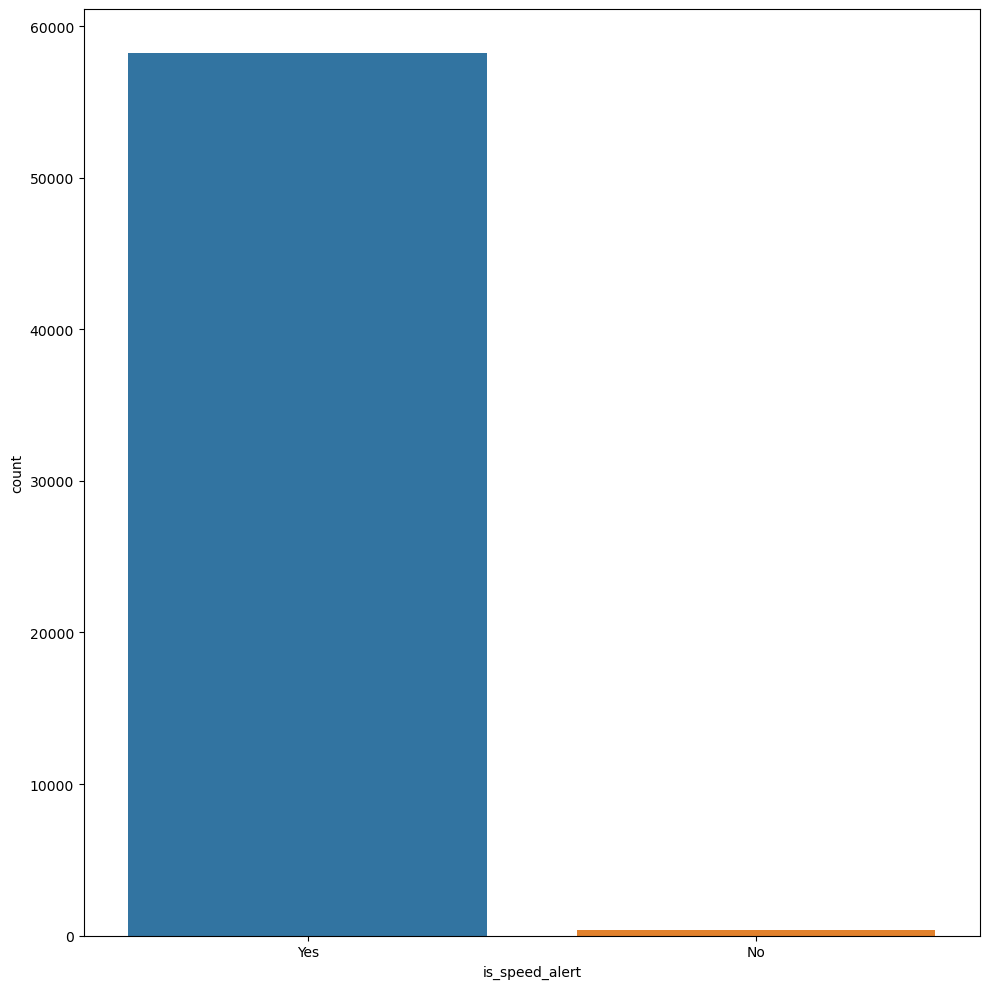

In [20]:

for i in range(1,len(categorical_feature)):
    plt.figure(figsize=(10,10))
    sns.countplot(x=df[categorical_feature[i]],data=df)
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

Text(0.5, 1.0, 'Ratio of the target feature')

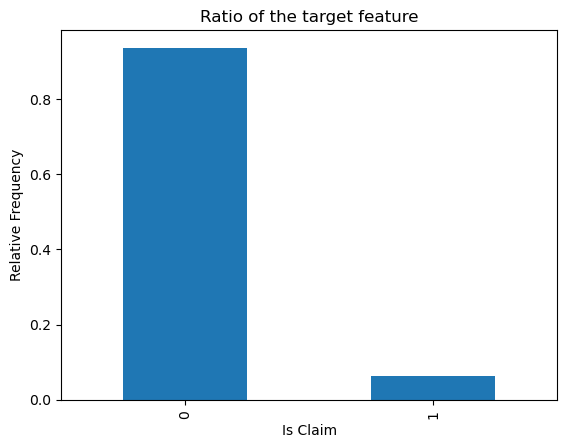

In [21]:
df["is_claim"].value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative Frequency")
plt.xlabel("Is Claim")
plt.title("Ratio of the target feature")

Text(0.5, 1.0, 'Numbers of sectors based on claims')

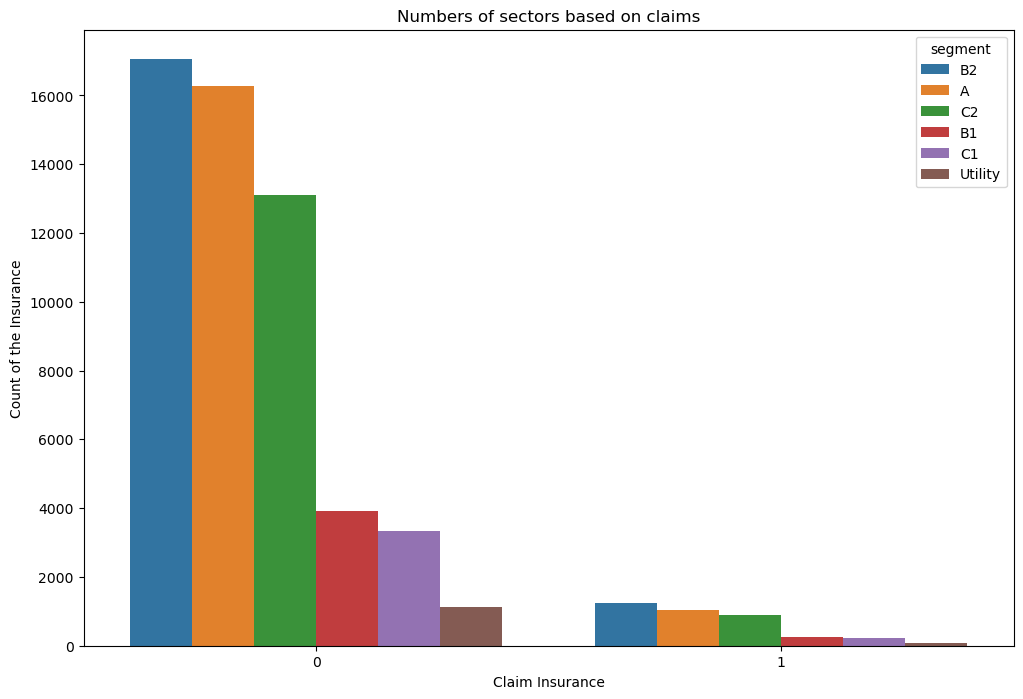

In [22]:
df_1 = df.groupby("is_claim")["segment"].value_counts().rename("count").to_frame().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x="is_claim",
           y="count",
           hue="segment",
           data=df_1)
plt.xlabel("Claim Insurance")
plt.ylabel("Count of the Insurance")
plt.title("Numbers of sectors based on claims")

<Axes: xlabel='model'>

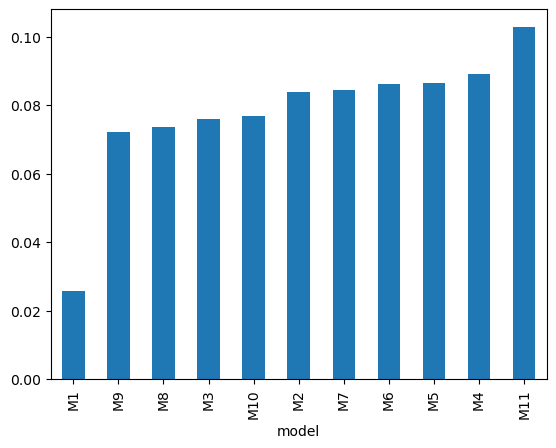

In [23]:
df.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")

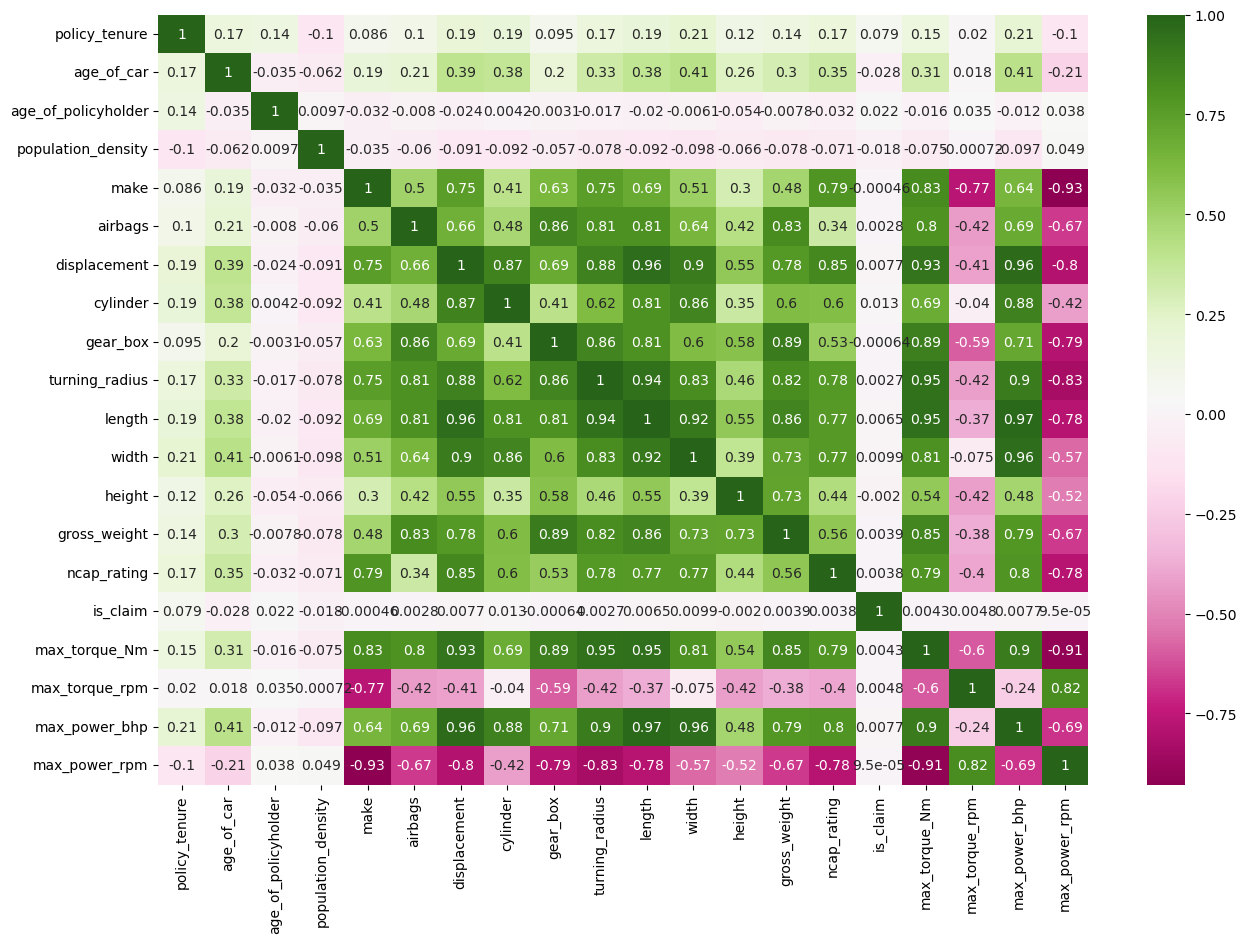

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG", annot_kws={"size": 10})
plt.show()

## Feature Engneering

## Label encoing

In [25]:
update_categorical_feature=[i for i in df.columns if df[i].dtype=='O']

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
for i in categorical_feature:

    if i in ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type','is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']:
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

## Frequency Encoding

cols = [i for i in categorical_feature if df[i].nunique()>10]

for feature in cols:
    g = (df.groupby(feature).size())/len(df)
    df[feature] = df[feature].replace(g)

In [29]:
  
cols = [i for i in update_categorical_feature if df[i].nunique()>5]

for feature in cols:
    g = dict(df.groupby(feature)['is_claim'].mean())
    df[feature] = df[feature].replace(g)

In [30]:
df = pd.get_dummies(df,columns=['fuel_type','steering_type'],drop_first = True)

In [31]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'turning_radius', 'length', 'width',
       'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'steering_type_Manual', 'steering_type_Power'],
      dtype='object')

In [32]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Splitting into train and test set

In [33]:
X =df.drop(['policy_id','is_claim','max_torque','max_power'], axis=1)
y =df['is_claim']

In [34]:
X.shape

(58592, 46)

In [35]:
y.shape

(58592,)

# Feature selection

In [36]:
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.00307748, 0.00166393, 0.        , 0.00341045, 0.00083896,
       0.00516191, 0.00384763, 0.00272986, 0.00231171, 0.00567085,
       0.00354812, 0.00934287, 0.00069217, 0.01202921, 0.00498714,
       0.00933753, 0.00288871, 0.00773997, 0.01222277, 0.00555967,
       0.00247274, 0.00349024, 0.00192218, 0.00165297, 0.00132026,
       0.01087021, 0.00240874, 0.00109884, 0.00424295, 0.01079989,
       0.01031829, 0.01003187, 0.0104218 , 0.00963309, 0.00674282,
       0.01272152, 0.01103588, 0.00315667, 0.00310314, 0.00410752,
       0.00142706, 0.00410449, 0.00257788, 0.00401377, 0.        ,
       0.00713738])

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

is_ecw                              0.012722
transmission_type                   0.012223
is_parking_sensors                  0.012029
is_speed_alert                      0.011036
is_front_fog_lights                 0.010870
is_brake_assist                     0.010800
is_power_steering                   0.010422
is_power_door_locks                 0.010318
is_central_locking                  0.010032
is_driver_seat_height_adjustable    0.009633
is_adjustable_steering              0.009343
rear_brakes_type                    0.009338
cylinder                            0.007740
steering_type_Power                 0.007137
is_day_night_rear_view_mirror       0.006743
airbags                             0.005671
gear_box                            0.005560
make                                0.005162
is_parking_camera                   0.004987
is_rear_window_defogger             0.004243
max_torque_rpm                      0.004108
max_power_rpm                       0.004104
fuel_type_

<Axes: >

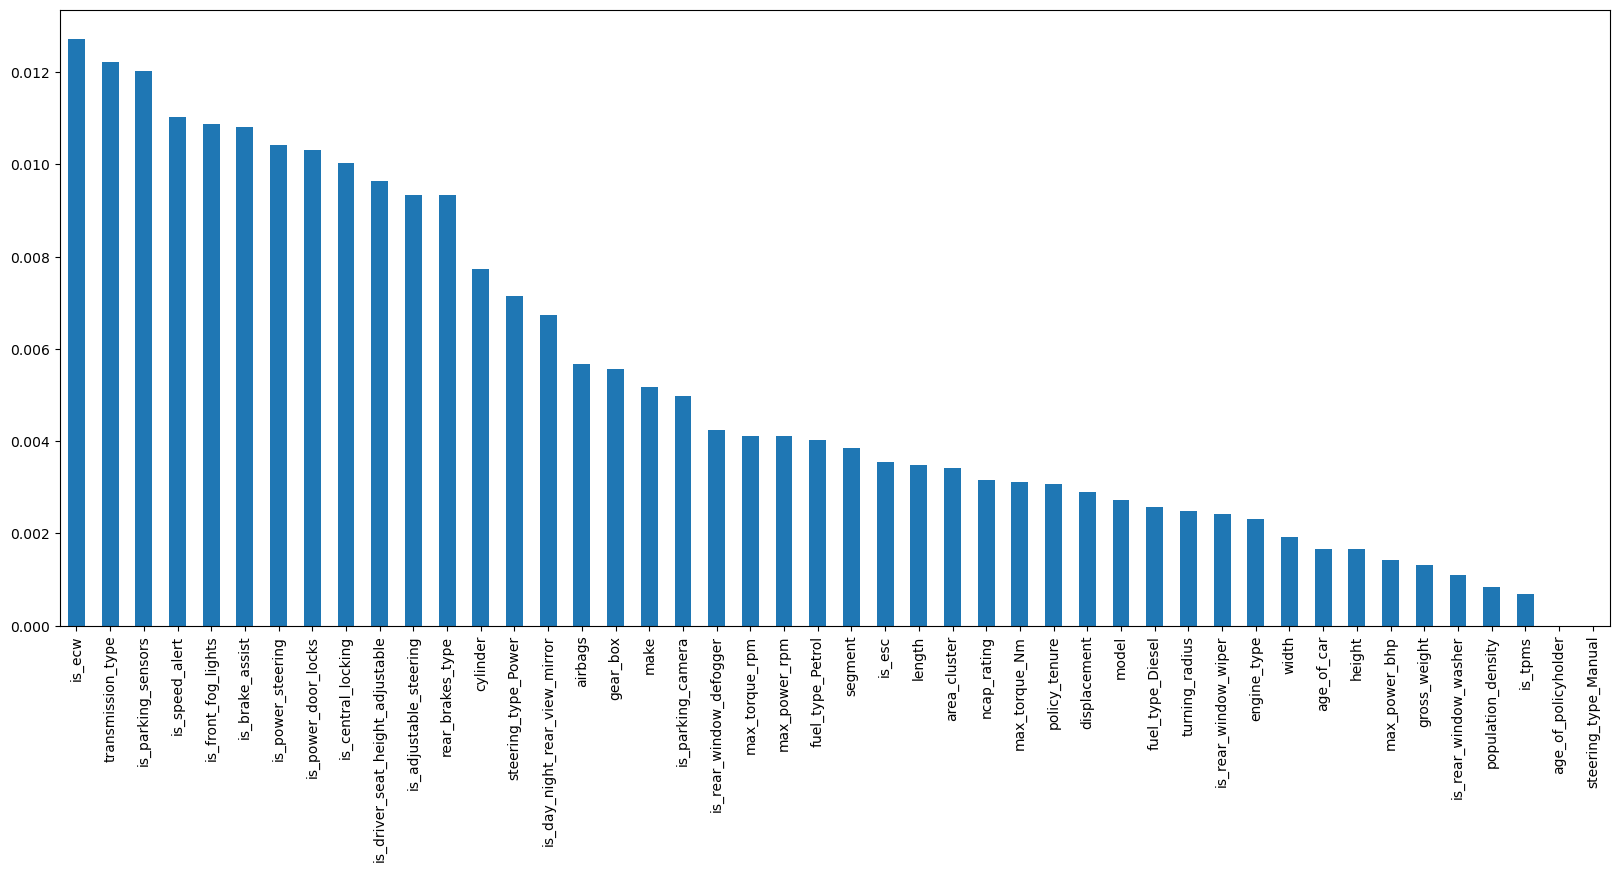

In [38]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# Handle Imbalance datasets

In [39]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [41]:
X_train

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,engine_type,airbags,...,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power
453,1.006002,0.29,0.538462,0.069870,8794,1,0.064099,0.074074,0.074074,2,...,1,2,113.0,4400.0,88.50,6000.0,0,1,0,0
22619,1.090612,0.02,0.567308,0.076776,7788,3,0.064275,0.064275,0.064275,6,...,1,3,250.0,2750.0,113.45,4000.0,1,0,0,1
36801,0.754331,0.04,0.442308,0.057745,34738,1,0.060389,0.061413,0.061413,2,...,1,0,60.0,3500.0,40.36,6000.0,0,0,0,1
11514,0.371536,0.00,0.567308,0.057745,34738,1,0.060389,0.061413,0.061413,2,...,1,0,60.0,3500.0,40.36,6000.0,0,0,0,1
42882,1.085741,0.14,0.519231,0.054751,34791,3,0.064275,0.064275,0.064275,6,...,1,3,250.0,2750.0,113.45,4000.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18843,0.607515,0.10,0.663462,0.069870,8794,4,0.068581,0.072591,0.072591,2,...,1,5,200.0,3000.0,88.77,4000.0,1,0,0,0
46309,0.248541,0.03,0.596154,0.070972,4076,1,0.060389,0.061413,0.061413,2,...,1,0,60.0,3500.0,40.36,6000.0,0,0,0,1
30394,1.108112,0.03,0.298077,0.069870,8794,1,0.068581,0.068162,0.068162,2,...,1,2,113.0,4400.0,88.50,6000.0,0,1,0,0
44955,0.772197,0.02,0.471154,0.070972,4076,1,0.060389,0.061413,0.061413,2,...,1,0,60.0,3500.0,40.36,6000.0,0,0,0,1


## 2. Under Sampling

In [42]:
ns=NearMiss()


In [43]:
X_train_up,y_train_up=ns.fit_resample(X_train,y_train)


In [44]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_up)))

The number of classes before fit Counter({0: 38416, 1: 2598})
The number of classes after fit Counter({0: 2598, 1: 2598})


## 3. Over Sampling

In [45]:
os=RandomOverSampler(sampling_strategy='minority')


In [46]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)


In [47]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 38416, 1: 2598})
The number of classes after fit Counter({0: 38416, 1: 38416})


## 4. SMOTETomek

In [48]:
SM_os=SMOTETomek()


In [49]:
X_train_sm,y_train_sm=SM_os.fit_resample(X_train,y_train)


In [50]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 38416, 1: 2598})
The number of classes after fit Counter({0: 36396, 1: 36396})


## 5. SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(sampling_strategy='minority')

In [53]:
X_train_smo,y_train_smo=smote.fit_resample(X_train,y_train)

## Scaling of numerical columns

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()

In [56]:
X_train_os=sc.fit_transform(X_train_os)
X_train_sm=sc.fit_transform(X_train_sm)
X_train_smo=sc.fit_transform(X_train_smo)
X_train_up=sc.fit_transform(X_train_up)
X_test=sc.transform(X_test)

## Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [58]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [59]:
classalgo_test(X_train_os,X_test,y_train_os,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.930993,0.137931,0.019402,0.930993,0.502935
XGBClassifier,0.999818,0.999636,0.999818,0.999818,0.924280,0.066986,0.020603,0.924280,0.500152
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.886506,0.082097,0.076816,0.886506,0.507842
KNeighborsClassifier,0.941600,0.895415,0.944822,0.941600,0.806292,0.081322,0.113973,0.806292,0.519919
BaggingClassifier,0.840288,0.800884,0.850103,0.840288,0.753726,0.096266,0.149007,0.753726,0.556492
LogisticRegression,0.578132,0.575660,0.584912,0.578132,0.664126,0.093119,0.155606,0.664126,0.575273
GradientBoostingClassifier,0.644380,0.624186,0.671120,0.644380,0.634259,0.099651,0.169702,0.634259,0.604985
AdaBoostClassifier,0.615668,0.601184,0.641338,0.615668,0.600296,0.094423,0.162974,0.600296,0.597732
GaussianNB,0.527775,0.522085,0.581667,0.527775,0.448231,0.070876,0.127081,0.448231,0.525273
BernoulliNB,0.521658,0.517686,0.569941,0.521658,0.430424,0.068633,0.123446,0.430424,0.515342


In [60]:
classalgo_test(X_train_sm,X_test,y_train_sm,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
KNeighborsClassifier,0.884410,0.830272,0.893166,0.884410,0.709580,0.080238,0.128988,0.709580,0.532469
LogisticRegression,0.592112,0.591466,0.593547,0.592112,0.572591,0.085580,0.148861,0.572591,0.571993
BernoulliNB,0.530347,0.527431,0.554050,0.530347,0.488508,0.071764,0.127511,0.488508,0.527008
AdaBoostClassifier,0.714117,0.687955,0.732719,0.714117,0.448800,0.080393,0.144459,0.448800,0.570864
GaussianNB,0.545197,0.531999,0.622956,0.545197,0.435943,0.072147,0.129729,0.435943,0.532042
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.352827,0.073988,0.135036,0.352827,0.547823
GradientBoostingClassifier,0.903204,0.952904,0.897584,0.903204,0.213506,0.070368,0.130558,0.213506,0.533938
XGBClassifier,0.993818,0.999444,0.993783,0.993818,0.205200,0.072091,0.133904,0.205200,0.546477
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.179372,0.070861,0.131913,0.179372,0.539128
BaggingClassifier,0.962674,0.997754,0.961311,0.962674,0.081067,0.065860,0.123501,0.081067,0.503518


In [61]:
classalgo_test(X_train_smo,X_test,y_train_smo,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
KNeighborsClassifier,0.869013,0.815752,0.879201,0.869013,0.712482,0.078402,0.125606,0.712482,0.527956
LogisticRegression,0.589845,0.589096,0.591562,0.589845,0.579474,0.083867,0.145434,0.579474,0.564354
BernoulliNB,0.530951,0.527449,0.559071,0.530951,0.476277,0.071307,0.127062,0.476277,0.525721
GaussianNB,0.543498,0.533217,0.604675,0.543498,0.456992,0.071989,0.128867,0.456992,0.529960
AdaBoostClassifier,0.713231,0.681819,0.736034,0.713231,0.450051,0.076648,0.137568,0.450051,0.552529
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.333257,0.073515,0.134544,0.333257,0.546653
XGBClassifier,0.993714,0.999237,0.993679,0.993714,0.212823,0.072627,0.134809,0.212823,0.549746
GradientBoostingClassifier,0.898766,0.936165,0.894232,0.898766,0.211458,0.071125,0.132006,0.211458,0.539312
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.197178,0.070852,0.131676,0.197178,0.538142
BaggingClassifier,0.962997,0.998850,0.961618,0.962997,0.079702,0.065919,0.123625,0.079702,0.504000


In [62]:
classalgo_test(X_train_up,X_test,y_train_up,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
GaussianNB,0.528291,1.000000,0.107104,0.528291,0.874730,0.057983,0.058974,0.874730,0.495881
LogisticRegression,0.728253,0.835787,0.676444,0.728253,0.363466,0.059190,0.107522,0.363466,0.466984
BernoulliNB,0.564088,0.549955,0.618108,0.564088,0.342246,0.065732,0.119957,0.342246,0.501727
AdaBoostClassifier,0.815050,0.856645,0.803597,0.815050,0.280294,0.064587,0.118827,0.280294,0.494865
KNeighborsClassifier,0.845073,0.934140,0.827364,0.845073,0.260781,0.062306,0.114850,0.260781,0.480382
GradientBoostingClassifier,0.851232,0.903582,0.840914,0.851232,0.240187,0.063073,0.116550,0.240187,0.484730
XGBClassifier,0.978445,0.996406,0.978048,0.978445,0.215155,0.063148,0.116999,0.215155,0.484681
BaggingClassifier,0.921863,0.969580,0.917680,0.921863,0.207760,0.063363,0.117490,0.207760,0.485981
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.206053,0.063828,0.118383,0.206053,0.489112
RandomForestClassifier,0.999808,1.000000,0.999808,0.999808,0.201047,0.063625,0.118061,0.201047,0.487646
